In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
num_of_data = 515345
num_of_dim = 90
num_of_party = 3
num_of_sample = 1000
num_of_center = 10
num_more_sample = 5000

# Plot for Kmeans Clustering

In [3]:
def kmeans_comm(n_data, n_dim):
    return n_data * n_dim

def uniform_comm(n_size, n_party):
    return n_size * n_party

def coreset_comm(n_size, n_party):
    return n_party + n_size * (3 * n_party)

def uniform_kmeans_comm(n_size, n_party, n_dim):
    return uniform_comm(n_size, n_party) + kmeans_comm(n_size, n_dim)

def coreset_kmeans_comm(n_size, n_party, n_dim):
    return coreset_comm(n_size, n_party) + kmeans_comm(n_size, n_dim)

def distkmeans_comm(n_data, n_party, n_dim, n_center):
    return n_dim * n_center + n_data * n_party

def uniform_distkmeans_comm(n_size, n_party, n_dim, n_center):
    return uniform_comm(n_size, n_party) + distkmeans_comm(n_size, n_party, n_dim, n_center)

def coreset_distkmeans_comm(n_size, n_party, n_dim, n_center):
    return coreset_comm(n_size, n_party) + distkmeans_comm(n_size, n_party, n_dim, n_center)

In [4]:
def box_plot(data, ax, labels, edge_color, fill_color):
    bp = ax.boxplot(data, labels = labels, patch_artist=True, widths=0.6)
  
    for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(bp[element], color=edge_color)

    for patch in bp['boxes']:
        patch.set(facecolor=fill_color)       
        
    return bp

def set_box_color(bp, color, fill_color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)
    
    for patch in bp['boxes']:
        patch.set(facecolor=fill_color)

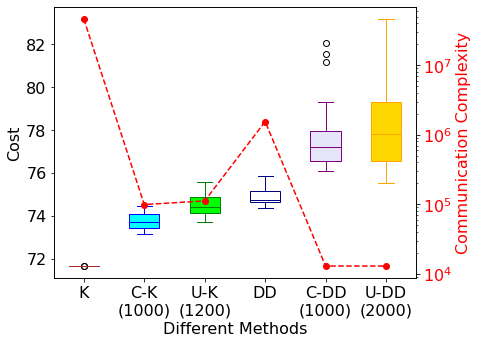

In [26]:
a = np.load("./res/kmeans-res/kmeans-10c.npy")
b = np.load("./res/kmeans-res/kmeans-coreset-10c1000s.npy")
c = np.load("./res/kmeans-res/kmeans-uniform-10c1200s.npy")
d = np.load("./res/kmeans-res/distkmeans-10c.npy")
e = np.load("./res/kmeans-res/distkmeans-coreset-10c1000s.npy")
f = np.load("./res/kmeans-res/distkmeans-uniform-10c2000s.npy")

a_comm = kmeans_comm(num_of_data, num_of_dim)
b_comm = coreset_kmeans_comm(num_of_sample, num_of_party, num_of_dim)
c_comm = uniform_kmeans_comm(1200, num_of_party, num_of_dim)
d_comm = distkmeans_comm(num_of_data, num_of_party, num_of_dim, num_of_center)
e_comm = coreset_distkmeans_comm(num_of_sample, num_of_party, num_of_dim, num_of_center)
f_comm = uniform_distkmeans_comm(2000, num_of_party, num_of_dim, num_of_center)

cost_seq = [a,b,c,d,e,f]
comm_seq = [a_comm,b_comm,c_comm,d_comm,e_comm,f_comm]
labels = ['K','C+K','U+K','D','C+D','U+D']

fig, ax1 = plt.subplots(figsize=(6.5,5))
ax1.set_xlabel('Different Methods',fontsize=16)
ax1.set_ylabel('Cost',fontsize=16)
#ax1.tick_params(axis='y', labelcolor='blue')
#bp = box_plot(cost_seq, ax1, labels, 'blue', 'white')
bp1 = ax1.boxplot([a], positions=[1], widths=0.5, patch_artist=True,labels=['K'])
bp2 = ax1.boxplot([b], positions=[2], widths=0.5, patch_artist=True,labels=['C-K\n(1000)'])
bp3 = ax1.boxplot([c], positions=[3], widths=0.5, patch_artist=True,labels=['U-K\n(1200)'])
bp4 = ax1.boxplot([d], positions=[4], widths=0.5, patch_artist=True,labels=['DD'])
bp5 = ax1.boxplot([e], positions=[5], widths=0.5, patch_artist=True,labels=['C-DD\n(1000)'])
bp6 = ax1.boxplot([f], positions=[6], widths=0.5, patch_artist=True,labels=['U-DD\n(2000)'])

set_box_color(bp1, 'brown', 'white')
set_box_color(bp2, 'blue', 'cyan')
set_box_color(bp3, 'green', 'lime')
set_box_color(bp4, 'navy', 'white')
set_box_color(bp5, 'purple', 'lavender')
set_box_color(bp6, 'orange', 'gold')

ax1.tick_params(axis='x',labelsize=16)
ax1.tick_params(axis='y',labelsize=16)

ax2 = ax1.twinx()
ax2.set_ylabel('Communication Complexity', color='red',fontsize=16)
ax2.set_yscale('log')
ax2.tick_params(axis='y', labelcolor='red',labelsize=16)
ax2.plot([1,2,3,4,5,6], comm_seq, 'ro--')
plt.savefig("kmeansdm.pdf", bbox_inches='tight')
plt.show()

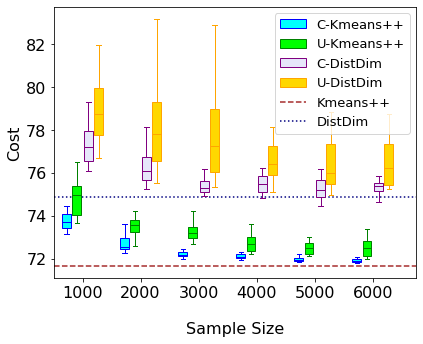

In [223]:
a1 = np.load('./res/kmeans-res/kmeans-coreset-10c1000s.npy')
b1 = np.load('./res/kmeans-res/kmeans-coreset-10c2000s.npy')
c1 = np.load('./res/kmeans-res/kmeans-coreset-10c3000s.npy')
d1 = np.load('./res/kmeans-res/kmeans-coreset-10c4000s.npy')
e1 = np.load('./res/kmeans-res/kmeans-coreset-10c5000s.npy')
f1 = np.load('./res/kmeans-res/kmeans-coreset-10c6000s.npy')

a2 = np.load('./res/kmeans-res/distkmeans-coreset-10c1000s.npy')
b2 = np.load('./res/kmeans-res/distkmeans-coreset-10c2000s.npy')
c2 = np.load('./res/kmeans-res/distkmeans-coreset-10c3000s.npy')
d2 = np.load('./res/kmeans-res/distkmeans-coreset-10c4000s.npy')
e2 = np.load('./res/kmeans-res/distkmeans-coreset-10c5000s.npy')
f2 = np.load('./res/kmeans-res/distkmeans-coreset-10c6000s.npy')

a3 = np.load('./res/kmeans-res/kmeans-uniform-10c1000s.npy')
b3 = np.load('./res/kmeans-res/kmeans-uniform-10c2000s.npy')
c3 = np.load('./res/kmeans-res/kmeans-uniform-10c3000s.npy')
d3 = np.load('./res/kmeans-res/kmeans-uniform-10c4000s.npy')
e3 = np.load('./res/kmeans-res/kmeans-uniform-10c5000s.npy')
f3 = np.load('./res/kmeans-res/kmeans-uniform-10c6000s.npy')

a4 = np.load('./res/kmeans-res/distkmeans-uniform-10c1000s.npy')
b4 = np.load('./res/kmeans-res/distkmeans-uniform-10c2000s.npy')
c4 = np.load('./res/kmeans-res/distkmeans-uniform-10c3000s.npy')
d4 = np.load('./res/kmeans-res/distkmeans-uniform-10c4000s.npy')
e4 = np.load('./res/kmeans-res/distkmeans-uniform-10c5000s.npy')
f4 = np.load('./res/kmeans-res/distkmeans-uniform-10c6000s.npy')

k = np.load('./res/kmeans-res/kmeans-10c.npy')
d = np.load('./res/kmeans-res/distkmeans-10c.npy')

k = np.mean(k)
d = np.mean(d)

data1 = [a1,b1,c1,d1,e1,f1]
data2 = [a2,b2,c2,d2,e2,f2]
data3 = [a3,b3,c3,d3,e3,f3]
data4 = [a4,b4,c4,d4,e4,f4]

ticks = ['1000\n','2000','3000','4000','5000','6000'] 

plt.figure(figsize=(6.5,5))

linek = plt.axhline(y=k, color='brown', linestyle='--')
lined = plt.axhline(y=d, color='navy', linestyle=':')

bp1 = plt.boxplot(data1, positions=np.array(range(len(data1)))*4.0-1.1, sym='', widths=0.6, patch_artist=True)
bp3 = plt.boxplot(data3, positions=np.array(range(len(data3)))*4.0-0.4, sym='', widths=0.6, patch_artist=True)
bp2 = plt.boxplot(data2, positions=np.array(range(len(data2)))*4.0+0.4, sym='', widths=0.6, patch_artist=True)
bp4 = plt.boxplot(data4, positions=np.array(range(len(data4)))*4.0+1.1, sym='', widths=0.6, patch_artist=True)
set_box_color(bp1, 'blue', 'cyan') # colors are from http://colorbrewer2.org/
set_box_color(bp2, 'purple', 'lavender')
set_box_color(bp3, 'green', 'lime')
set_box_color(bp4, 'orange', 'gold')

plt.xticks(range(0, len(ticks) * 4, 4), ticks, fontsize=16)
plt.xlim(-2, len(ticks)*4-1)
plt.yticks(fontsize=16)

plt.xlabel('Sample Size', fontsize=16)
plt.ylabel('Cost', fontsize=16)

plt.legend([bp1["boxes"][0], bp3["boxes"][0], bp2["boxes"][0], bp4["boxes"][0], linek, lined], \
           ['C-Kmeans++', 'U-Kmeans++', 'C-DistDim', 'U-DistDim', 'Kmeans++','DistDim'], loc='upper right', prop = {'size':13})

plt.savefig("kmeansds.pdf", bbox_inches='tight')
plt.show()

# Plot with different number of parties

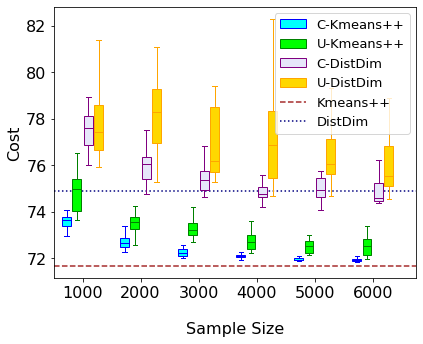

In [27]:
a1 = np.load('./res/kmeans/kmeans-coreset-10c1000s5p.npy')
b1 = np.load('./res/kmeans/kmeans-coreset-10c2000s5p.npy')
c1 = np.load('./res/kmeans/kmeans-coreset-10c3000s5p.npy')
d1 = np.load('./res/kmeans/kmeans-coreset-10c4000s5p.npy')
e1 = np.load('./res/kmeans/kmeans-coreset-10c5000s5p.npy')
f1 = np.load('./res/kmeans/kmeans-coreset-10c6000s5p.npy')

a2 = np.load('./res/kmeans/distkmeans-coreset-10c1000s5p.npy')
b2 = np.load('./res/kmeans/distkmeans-coreset-10c2000s5p.npy')
c2 = np.load('./res/kmeans/distkmeans-coreset-10c3000s5p.npy')
d2 = np.load('./res/kmeans/distkmeans-coreset-10c4000s5p.npy')
e2 = np.load('./res/kmeans/distkmeans-coreset-10c5000s5p.npy')
f2 = np.load('./res/kmeans/distkmeans-coreset-10c6000s5p.npy')

a3 = np.load('./res/kmeans-res/kmeans-uniform-10c1000s.npy')
b3 = np.load('./res/kmeans-res/kmeans-uniform-10c2000s.npy')
c3 = np.load('./res/kmeans-res/kmeans-uniform-10c3000s.npy')
d3 = np.load('./res/kmeans-res/kmeans-uniform-10c4000s.npy')
e3 = np.load('./res/kmeans-res/kmeans-uniform-10c5000s.npy')
f3 = np.load('./res/kmeans-res/kmeans-uniform-10c6000s.npy')

a4 = np.load('./res/kmeans/distkmeans-uniform-10c1000s5p.npy')
b4 = np.load('./res/kmeans/distkmeans-uniform-10c2000s5p.npy')
c4 = np.load('./res/kmeans/distkmeans-uniform-10c3000s5p.npy')
d4 = np.load('./res/kmeans/distkmeans-uniform-10c4000s5p.npy')
e4 = np.load('./res/kmeans/distkmeans-uniform-10c5000s5p.npy')
f4 = np.load('./res/kmeans/distkmeans-uniform-10c6000s5p.npy')

k = np.load('./res/kmeans-res/kmeans-10c.npy')
d = np.load('./res/kmeans-res/distkmeans-10c.npy')

k = np.mean(k)
d = np.mean(d)

data1 = [a1,b1,c1,d1,e1,f1]
data2 = [a2,b2,c2,d2,e2,f2]
data3 = [a3,b3,c3,d3,e3,f3]
data4 = [a4,b4,c4,d4,e4,f4]

ticks = ['1000\n','2000','3000','4000','5000','6000'] 

plt.figure(figsize=(6.5,5))

linek = plt.axhline(y=k, color='brown', linestyle='--')
lined = plt.axhline(y=d, color='navy', linestyle=':')

bp1 = plt.boxplot(data1, positions=np.array(range(len(data1)))*4.0-1.1, sym='', widths=0.6, patch_artist=True)
bp3 = plt.boxplot(data3, positions=np.array(range(len(data3)))*4.0-0.4, sym='', widths=0.6, patch_artist=True)
bp2 = plt.boxplot(data2, positions=np.array(range(len(data2)))*4.0+0.4, sym='', widths=0.6, patch_artist=True)
bp4 = plt.boxplot(data4, positions=np.array(range(len(data4)))*4.0+1.1, sym='', widths=0.6, patch_artist=True)
set_box_color(bp1, 'blue', 'cyan') # colors are from http://colorbrewer2.org/
set_box_color(bp2, 'purple', 'lavender')
set_box_color(bp3, 'green', 'lime')
set_box_color(bp4, 'orange', 'gold')

plt.xticks(range(0, len(ticks) * 4, 4), ticks, fontsize=16)
plt.xlim(-2, len(ticks)*4-1)
plt.yticks(fontsize=16)

plt.xlabel('Sample Size', fontsize=16)
plt.ylabel('Cost', fontsize=16)

plt.legend([bp1["boxes"][0], bp3["boxes"][0], bp2["boxes"][0], bp4["boxes"][0], linek, lined], \
           ['C-Kmeans++', 'U-Kmeans++', 'C-DistDim', 'U-DistDim', 'Kmeans++','DistDim'], loc='upper right', prop = {'size':13})

plt.savefig("kmeansds5p.pdf", bbox_inches='tight')
plt.show()

In [28]:
num_of_data = 515345
num_of_dim = 90
num_of_party = 5
num_of_center = 10

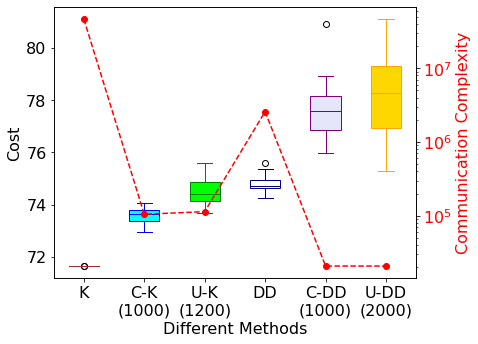

In [29]:
a = np.load("./res/kmeans-res/kmeans-10c.npy")
b = np.load("./res/kmeans/kmeans-coreset-10c1000s5p.npy")
c = np.load("./res/kmeans-res/kmeans-uniform-10c1200s.npy")
d = np.load("./res/kmeans/distkmeans-10c5p.npy")
e = np.load("./res/kmeans/distkmeans-coreset-10c1000s5p.npy")
f = np.load("./res/kmeans/distkmeans-uniform-10c2000s5p.npy")

a_comm = kmeans_comm(num_of_data, num_of_dim)
b_comm = coreset_kmeans_comm(1000, num_of_party, num_of_dim)
c_comm = uniform_kmeans_comm(1200, num_of_party, num_of_dim)
d_comm = distkmeans_comm(num_of_data, num_of_party, num_of_dim, num_of_center)
e_comm = coreset_distkmeans_comm(1000, num_of_party, num_of_dim, num_of_center)
f_comm = uniform_distkmeans_comm(2000, num_of_party, num_of_dim, num_of_center)

cost_seq = [a,b,c,d,e,f]
comm_seq = [a_comm,b_comm,c_comm,d_comm,e_comm,f_comm]
labels = ['K','C+K','U+K','D','C+D','U+D']

fig, ax1 = plt.subplots(figsize=(6.5,5))
ax1.set_xlabel('Different Methods',fontsize=16)
ax1.set_ylabel('Cost',fontsize=16)
#ax1.tick_params(axis='y', labelcolor='blue')
#bp = box_plot(cost_seq, ax1, labels, 'blue', 'white')
bp1 = ax1.boxplot([a], positions=[1], widths=0.5, patch_artist=True,labels=['K'])
bp2 = ax1.boxplot([b], positions=[2], widths=0.5, patch_artist=True,labels=['C-K\n(1000)'])
bp3 = ax1.boxplot([c], positions=[3], widths=0.5, patch_artist=True,labels=['U-K\n(1200)'])
bp4 = ax1.boxplot([d], positions=[4], widths=0.5, patch_artist=True,labels=['DD'])
bp5 = ax1.boxplot([e], positions=[5], widths=0.5, patch_artist=True,labels=['C-DD\n(1000)'])
bp6 = ax1.boxplot([f], positions=[6], widths=0.5, patch_artist=True,labels=['U-DD\n(2000)'])

set_box_color(bp1, 'brown', 'white')
set_box_color(bp2, 'blue', 'cyan')
set_box_color(bp3, 'green', 'lime')
set_box_color(bp4, 'navy', 'white')
set_box_color(bp5, 'purple', 'lavender')
set_box_color(bp6, 'orange', 'gold')

ax1.tick_params(axis='x',labelsize=16)
ax1.tick_params(axis='y',labelsize=16)

ax2 = ax1.twinx()
ax2.set_ylabel('Communication Complexity', color='red',fontsize=16)
ax2.set_yscale('log')
ax2.tick_params(axis='y', labelcolor='red',labelsize=16)
ax2.plot([1,2,3,4,5,6], comm_seq, 'ro--')
plt.savefig("kmeansdm5p.pdf", bbox_inches='tight')
plt.show()

# Plot with different number of centers

In [135]:
num_of_data = 515345
num_of_dim = 90
num_of_party = 3
num_of_center = 5

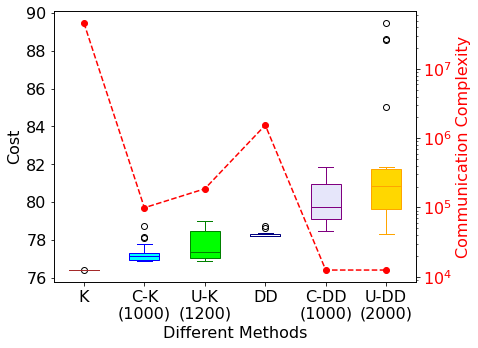

In [136]:
a = np.load("./res/kmeans/kmeans-5c.npy")
b = np.load("./res/kmeans/kmeans-coreset-5c1000s.npy")
c = np.load("./res/kmeans/kmeans-uniform-5c2000s.npy")
d = np.load("./res/kmeans/distkmeans-5c.npy")
e = np.load("./res/kmeans/distkmeans-coreset-5c1000s.npy")
f = np.load("./res/kmeans/distkmeans-uniform-5c2000s.npy")

a_comm = kmeans_comm(num_of_data, num_of_dim)
b_comm = coreset_kmeans_comm(num_of_sample, num_of_party, num_of_dim)
c_comm = uniform_kmeans_comm(2000, num_of_party, num_of_dim)
d_comm = distkmeans_comm(num_of_data, num_of_party, num_of_dim, num_of_center)
e_comm = coreset_distkmeans_comm(num_of_sample, num_of_party, num_of_dim, num_of_center)
f_comm = uniform_distkmeans_comm(2000, num_of_party, num_of_dim, num_of_center)

cost_seq = [a,b,c,d,e,f]
comm_seq = [a_comm,b_comm,c_comm,d_comm,e_comm,f_comm]
labels = ['K','C+K','U+K','D','C+D','U+D']

fig, ax1 = plt.subplots(figsize=(6.5,5))
ax1.set_xlabel('Different Methods',fontsize=16)
ax1.set_ylabel('Cost',fontsize=16)
#ax1.tick_params(axis='y', labelcolor='blue')
#bp = box_plot(cost_seq, ax1, labels, 'blue', 'white')
bp1 = ax1.boxplot([a], positions=[1], widths=0.5, patch_artist=True,labels=['K'])
bp2 = ax1.boxplot([b], positions=[2], widths=0.5, patch_artist=True,labels=['C-K\n(1000)'])
bp3 = ax1.boxplot([c], positions=[3], widths=0.5, patch_artist=True,labels=['U-K\n(1200)'])
bp4 = ax1.boxplot([d], positions=[4], widths=0.5, patch_artist=True,labels=['DD'])
bp5 = ax1.boxplot([e], positions=[5], widths=0.5, patch_artist=True,labels=['C-DD\n(1000)'])
bp6 = ax1.boxplot([f], positions=[6], widths=0.5, patch_artist=True,labels=['U-DD\n(2000)'])

set_box_color(bp1, 'brown', 'white')
set_box_color(bp2, 'blue', 'cyan')
set_box_color(bp3, 'green', 'lime')
set_box_color(bp4, 'navy', 'white')
set_box_color(bp5, 'purple', 'lavender')
set_box_color(bp6, 'orange', 'gold')

ax1.tick_params(axis='x',labelsize=16)
ax1.tick_params(axis='y',labelsize=16)

ax2 = ax1.twinx()
ax2.set_ylabel('Communication Complexity', color='red',fontsize=16)
ax2.set_yscale('log')
ax2.tick_params(axis='y', labelcolor='red',labelsize=16)
ax2.plot([1,2,3,4,5,6], comm_seq, 'ro--')
plt.savefig("kmeansdm5c.pdf", bbox_inches='tight')
plt.show()

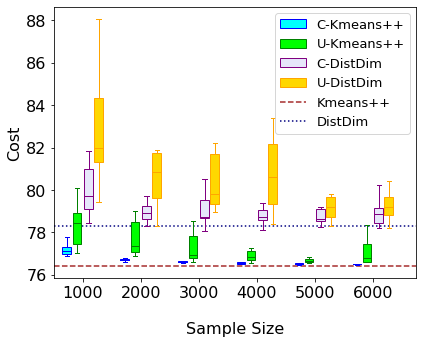

In [137]:
a1 = np.load('./res/kmeans/kmeans-coreset-5c1000s.npy')
b1 = np.load('./res/kmeans/kmeans-coreset-5c2000s.npy')
c1 = np.load('./res/kmeans/kmeans-coreset-5c3000s.npy')
d1 = np.load('./res/kmeans/kmeans-coreset-5c4000s.npy')
e1 = np.load('./res/kmeans/kmeans-coreset-5c5000s.npy')
f1 = np.load('./res/kmeans/kmeans-coreset-5c6000s.npy')

a2 = np.load('./res/kmeans/distkmeans-coreset-5c1000s.npy')
b2 = np.load('./res/kmeans/distkmeans-coreset-5c2000s.npy')
c2 = np.load('./res/kmeans/distkmeans-coreset-5c3000s.npy')
d2 = np.load('./res/kmeans/distkmeans-coreset-5c4000s.npy')
e2 = np.load('./res/kmeans/distkmeans-coreset-5c5000s.npy')
f2 = np.load('./res/kmeans/distkmeans-coreset-5c6000s.npy')

a3 = np.load('./res/kmeans/kmeans-uniform-5c1000s.npy')
b3 = np.load('./res/kmeans/kmeans-uniform-5c2000s.npy')
c3 = np.load('./res/kmeans/kmeans-uniform-5c3000s.npy')
d3 = np.load('./res/kmeans/kmeans-uniform-5c4000s.npy')
e3 = np.load('./res/kmeans/kmeans-uniform-5c5000s.npy')
f3 = np.load('./res/kmeans/kmeans-uniform-5c6000s.npy')

a4 = np.load('./res/kmeans/distkmeans-uniform-5c1000s.npy')
b4 = np.load('./res/kmeans/distkmeans-uniform-5c2000s.npy')
c4 = np.load('./res/kmeans/distkmeans-uniform-5c3000s.npy')
d4 = np.load('./res/kmeans/distkmeans-uniform-5c4000s.npy')
e4 = np.load('./res/kmeans/distkmeans-uniform-5c5000s.npy')
f4 = np.load('./res/kmeans/distkmeans-uniform-5c6000s.npy')

k = np.load('./res/kmeans/kmeans-5c.npy')
d = np.load('./res/kmeans/distkmeans-5c.npy')

k = np.mean(k)
d = np.mean(d)

data1 = [a1,b1,c1,d1,e1,f1]
data2 = [a2,b2,c2,d2,e2,f2]
data3 = [a3,b3,c3,d3,e3,f3]
data4 = [a4,b4,c4,d4,e4,f4]

ticks = ['1000\n','2000','3000','4000','5000','6000'] 

plt.figure(figsize=(6.5,5))

linek = plt.axhline(y=k, color='brown', linestyle='--')
lined = plt.axhline(y=d, color='navy', linestyle=':')

bp1 = plt.boxplot(data1, positions=np.array(range(len(data1)))*4.0-1.1, sym='', widths=0.6, patch_artist=True)
bp3 = plt.boxplot(data3, positions=np.array(range(len(data3)))*4.0-0.4, sym='', widths=0.6, patch_artist=True)
bp2 = plt.boxplot(data2, positions=np.array(range(len(data2)))*4.0+0.4, sym='', widths=0.6, patch_artist=True)
bp4 = plt.boxplot(data4, positions=np.array(range(len(data4)))*4.0+1.1, sym='', widths=0.6, patch_artist=True)
set_box_color(bp1, 'blue', 'cyan') # colors are from http://colorbrewer2.org/
set_box_color(bp2, 'purple', 'lavender')
set_box_color(bp3, 'green', 'lime')
set_box_color(bp4, 'orange', 'gold')

plt.xticks(range(0, len(ticks) * 4, 4), ticks, fontsize=16)
plt.xlim(-2, len(ticks)*4-1)
plt.yticks(fontsize=16)

plt.xlabel('Sample Size', fontsize=16)
plt.ylabel('Cost', fontsize=16)

plt.legend([bp1["boxes"][0], bp3["boxes"][0], bp2["boxes"][0], bp4["boxes"][0], linek, lined], \
           ['C-Kmeans++', 'U-Kmeans++', 'C-DistDim', 'U-DistDim', 'Kmeans++','DistDim'], loc='upper right', prop = {'size':13})

plt.savefig("kmeansds5c.pdf", bbox_inches='tight')
plt.show()

In [138]:
num_of_data = 515345
num_of_dim = 90
num_of_party = 3
num_of_center = 15

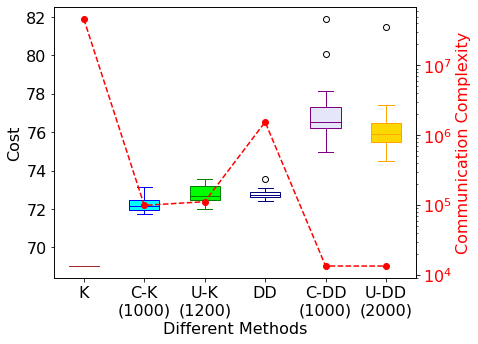

In [147]:
a = np.load("./res/kmeans/kmeans-15c.npy")
b = np.load("./res/kmeans/kmeans-coreset-15c1000s.npy")
c = np.load("./res/kmeans/kmeans-uniform-15c1200s.npy")
d = np.load("./res/kmeans/distkmeans-15c.npy")
e = np.load("./res/kmeans/distkmeans-coreset-15c1000s.npy")
f = np.load("./res/kmeans/distkmeans-uniform-15c2000s.npy")

a_comm = kmeans_comm(num_of_data, num_of_dim)
b_comm = coreset_kmeans_comm(num_of_sample, num_of_party, num_of_dim)
c_comm = uniform_kmeans_comm(1200, num_of_party, num_of_dim)
d_comm = distkmeans_comm(num_of_data, num_of_party, num_of_dim, num_of_center)
e_comm = coreset_distkmeans_comm(num_of_sample, num_of_party, num_of_dim, num_of_center)
f_comm = uniform_distkmeans_comm(2000, num_of_party, num_of_dim, num_of_center)

cost_seq = [a,b,c,d,e,f]
comm_seq = [a_comm,b_comm,c_comm,d_comm,e_comm,f_comm]
labels = ['K','C+K','U+K','D','C+D','U+D']

fig, ax1 = plt.subplots(figsize=(6.5,5))
ax1.set_xlabel('Different Methods',fontsize=16)
ax1.set_ylabel('Cost',fontsize=16)
#ax1.tick_params(axis='y', labelcolor='blue')
#bp = box_plot(cost_seq, ax1, labels, 'blue', 'white')
bp1 = ax1.boxplot([a], positions=[1], widths=0.5, patch_artist=True,labels=['K'])
bp2 = ax1.boxplot([b], positions=[2], widths=0.5, patch_artist=True,labels=['C-K\n(1000)'])
bp3 = ax1.boxplot([c], positions=[3], widths=0.5, patch_artist=True,labels=['U-K\n(1200)'])
bp4 = ax1.boxplot([d], positions=[4], widths=0.5, patch_artist=True,labels=['DD'])
bp5 = ax1.boxplot([e], positions=[5], widths=0.5, patch_artist=True,labels=['C-DD\n(1000)'])
bp6 = ax1.boxplot([f], positions=[6], widths=0.5, patch_artist=True,labels=['U-DD\n(2000)'])

set_box_color(bp1, 'brown', 'white')
set_box_color(bp2, 'blue', 'cyan')
set_box_color(bp3, 'green', 'lime')
set_box_color(bp4, 'navy', 'white')
set_box_color(bp5, 'purple', 'lavender')
set_box_color(bp6, 'orange', 'gold')

ax1.tick_params(axis='x',labelsize=16)
ax1.tick_params(axis='y',labelsize=16)

ax2 = ax1.twinx()
ax2.set_ylabel('Communication Complexity', color='red',fontsize=16)
ax2.set_yscale('log')
ax2.tick_params(axis='y', labelcolor='red',labelsize=16)
ax2.plot([1,2,3,4,5,6], comm_seq, 'ro--')
plt.savefig("kmeansdm15c.pdf", bbox_inches='tight')
plt.show()

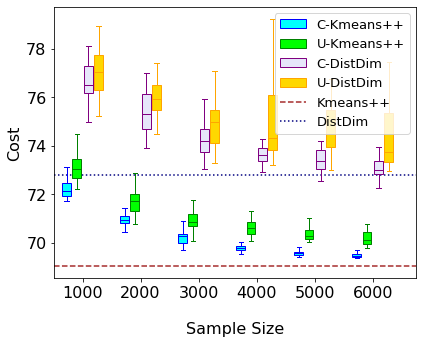

In [148]:
a1 = np.load('./res/kmeans/kmeans-coreset-15c1000s.npy')
b1 = np.load('./res/kmeans/kmeans-coreset-15c2000s.npy')
c1 = np.load('./res/kmeans/kmeans-coreset-15c3000s.npy')
d1 = np.load('./res/kmeans/kmeans-coreset-15c4000s.npy')
e1 = np.load('./res/kmeans/kmeans-coreset-15c5000s.npy')
f1 = np.load('./res/kmeans/kmeans-coreset-15c6000s.npy')

a2 = np.load('./res/kmeans/distkmeans-coreset-15c1000s.npy')
b2 = np.load('./res/kmeans/distkmeans-coreset-15c2000s.npy')
c2 = np.load('./res/kmeans/distkmeans-coreset-15c3000s.npy')
d2 = np.load('./res/kmeans/distkmeans-coreset-15c4000s.npy')
e2 = np.load('./res/kmeans/distkmeans-coreset-15c5000s.npy')
f2 = np.load('./res/kmeans/distkmeans-coreset-15c6000s.npy')

a3 = np.load('./res/kmeans/kmeans-uniform-15c1000s.npy')
b3 = np.load('./res/kmeans/kmeans-uniform-15c2000s.npy')
c3 = np.load('./res/kmeans/kmeans-uniform-15c3000s.npy')
d3 = np.load('./res/kmeans/kmeans-uniform-15c4000s.npy')
e3 = np.load('./res/kmeans/kmeans-uniform-15c5000s.npy')
f3 = np.load('./res/kmeans/kmeans-uniform-15c6000s.npy')

a4 = np.load('./res/kmeans/distkmeans-uniform-15c1000s.npy')
b4 = np.load('./res/kmeans/distkmeans-uniform-15c2000s.npy')
c4 = np.load('./res/kmeans/distkmeans-uniform-15c3000s.npy')
d4 = np.load('./res/kmeans/distkmeans-uniform-15c4000s.npy')
e4 = np.load('./res/kmeans/distkmeans-uniform-15c5000s.npy')
f4 = np.load('./res/kmeans/distkmeans-uniform-15c6000s.npy')

k = np.load('./res/kmeans/kmeans-15c.npy')
d = np.load('./res/kmeans/distkmeans-15c.npy')

k = np.mean(k)
d = np.mean(d)

data1 = [a1,b1,c1,d1,e1,f1]
data2 = [a2,b2,c2,d2,e2,f2]
data3 = [a3,b3,c3,d3,e3,f3]
data4 = [a4,b4,c4,d4,e4,f4]

ticks = ['1000\n','2000','3000','4000','5000','6000'] 

plt.figure(figsize=(6.5,5))

linek = plt.axhline(y=k, color='brown', linestyle='--')
lined = plt.axhline(y=d, color='navy', linestyle=':')

bp1 = plt.boxplot(data1, positions=np.array(range(len(data1)))*4.0-1.1, sym='', widths=0.6, patch_artist=True)
bp3 = plt.boxplot(data3, positions=np.array(range(len(data3)))*4.0-0.4, sym='', widths=0.6, patch_artist=True)
bp2 = plt.boxplot(data2, positions=np.array(range(len(data2)))*4.0+0.4, sym='', widths=0.6, patch_artist=True)
bp4 = plt.boxplot(data4, positions=np.array(range(len(data4)))*4.0+1.1, sym='', widths=0.6, patch_artist=True)
set_box_color(bp1, 'blue', 'cyan') # colors are from http://colorbrewer2.org/
set_box_color(bp2, 'purple', 'lavender')
set_box_color(bp3, 'green', 'lime')
set_box_color(bp4, 'orange', 'gold')

plt.xticks(range(0, len(ticks) * 4, 4), ticks, fontsize=16)
plt.xlim(-2, len(ticks)*4-1)
plt.yticks(fontsize=16)

plt.xlabel('Sample Size', fontsize=16)
plt.ylabel('Cost', fontsize=16)

plt.legend([bp1["boxes"][0], bp3["boxes"][0], bp2["boxes"][0], bp4["boxes"][0], linek, lined], \
           ['C-Kmeans++', 'U-Kmeans++', 'C-DistDim', 'U-DistDim', 'Kmeans++','DistDim'], loc='upper right', prop = {'size':13})

plt.savefig("kmeansds15c.pdf", bbox_inches='tight')
plt.show()

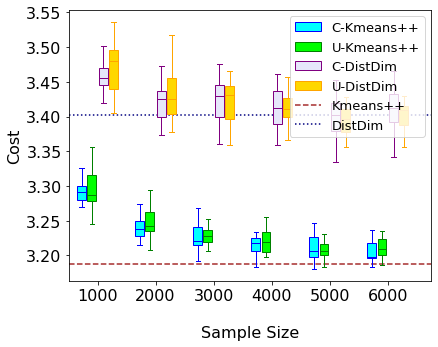

In [233]:
a1 = np.load('./res/kmeans/covtype-kmeans-coreset-15c1000s.npy')
b1 = np.load('./res/kmeans/covtype-kmeans-coreset-15c2000s.npy')
c1 = np.load('./res/kmeans/covtype-kmeans-coreset-15c3000s.npy')
d1 = np.load('./res/kmeans/covtype-kmeans-coreset-15c4000s.npy')
e1 = np.load('./res/kmeans/covtype-kmeans-coreset-15c5000s.npy')
f1 = np.load('./res/kmeans/covtype-kmeans-coreset-15c6000s.npy')

a2 = np.load('./res/kmeans/covtype-distkmeans-coreset-15c1000s.npy')
b2 = np.load('./res/kmeans/covtype-distkmeans-coreset-15c2000s.npy')
c2 = np.load('./res/kmeans/covtype-distkmeans-coreset-15c3000s.npy')
d2 = np.load('./res/kmeans/covtype-distkmeans-coreset-15c4000s.npy')
e2 = np.load('./res/kmeans/covtype-distkmeans-coreset-15c5000s.npy')
f2 = np.load('./res/kmeans/covtype-distkmeans-coreset-15c6000s.npy')

a3 = np.load('./res/kmeans/covtype-kmeans-uniform-15c1000s.npy')
b3 = np.load('./res/kmeans/covtype-kmeans-uniform-15c2000s.npy')
c3 = np.load('./res/kmeans/covtype-kmeans-uniform-15c3000s.npy')
d3 = np.load('./res/kmeans/covtype-kmeans-uniform-15c4000s.npy')
e3 = np.load('./res/kmeans/covtype-kmeans-uniform-15c5000s.npy')
f3 = np.load('./res/kmeans/covtype-kmeans-uniform-15c6000s.npy')

a4 = np.load('./res/kmeans/covtype-distkmeans-uniform-15c1000s.npy')
b4 = np.load('./res/kmeans/covtype-distkmeans-uniform-15c2000s.npy')
c4 = np.load('./res/kmeans/covtype-distkmeans-uniform-15c3000s.npy')
d4 = np.load('./res/kmeans/covtype-distkmeans-uniform-15c4000s.npy')
e4 = np.load('./res/kmeans/covtype-distkmeans-uniform-15c5000s.npy')
f4 = np.load('./res/kmeans/covtype-distkmeans-uniform-15c6000s.npy')

k = np.load('./res/kmeans/covtype-kmeans-15c.npy')
d = np.load('./res/kmeans/covtype-distkmeans-15c.npy')

k = np.mean(k)
d = np.mean(d)

data1 = [a1,b1,c1,d1,e1,f1]
data2 = [a2,b2,c2,d2,e2,f2]
data3 = [a3,b3,c3,d3,e3,f3]
data4 = [a4,b4,c4,d4,e4,f4]

ticks = ['1000\n','2000','3000','4000','5000','6000'] 

plt.figure(figsize=(6.5,5))

linek = plt.axhline(y=k, color='brown', linestyle='--')
lined = plt.axhline(y=d, color='navy', linestyle=':')

bp1 = plt.boxplot(data1, positions=np.array(range(len(data1)))*4.0-1.1, sym='', widths=0.6, patch_artist=True)
bp3 = plt.boxplot(data3, positions=np.array(range(len(data3)))*4.0-0.4, sym='', widths=0.6, patch_artist=True)
bp2 = plt.boxplot(data2, positions=np.array(range(len(data2)))*4.0+0.4, sym='', widths=0.6, patch_artist=True)
bp4 = plt.boxplot(data4, positions=np.array(range(len(data4)))*4.0+1.1, sym='', widths=0.6, patch_artist=True)
set_box_color(bp1, 'blue', 'cyan') # colors are from http://colorbrewer2.org/
set_box_color(bp2, 'purple', 'lavender')
set_box_color(bp3, 'green', 'lime')
set_box_color(bp4, 'orange', 'gold')

plt.xticks(range(0, len(ticks) * 4, 4), ticks, fontsize=16)
plt.xlim(-2, len(ticks)*4-1)
plt.yticks(fontsize=16)

plt.xlabel('Sample Size', fontsize=16)
plt.ylabel('Cost', fontsize=16)

plt.legend([bp1["boxes"][0], bp3["boxes"][0], bp2["boxes"][0], bp4["boxes"][0], linek, lined], \
           ['C-Kmeans++', 'U-Kmeans++', 'C-DistDim', 'U-DistDim', 'Kmeans++','DistDim'], loc='upper right', prop = {'size':13})

#plt.savefig("kmeansds.pdf", bbox_inches='tight')
plt.show()

In [17]:
num_of_data = 434874
num_of_dim = 4
num_of_party = 2
num_of_sample = 1000
num_of_center = 15
num_more_sample = 5000

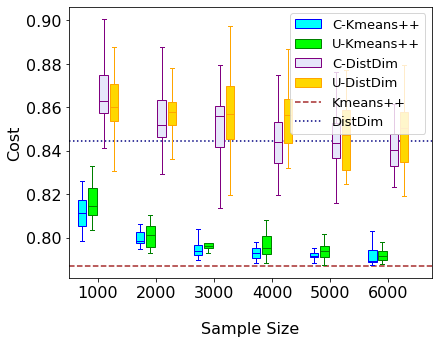

In [234]:
a1 = np.load('./res/kmeans/spatial-kmeans-coreset-15c1000s.npy')
b1 = np.load('./res/kmeans/spatial-kmeans-coreset-15c2000s.npy')
c1 = np.load('./res/kmeans/spatial-kmeans-coreset-15c3000s.npy')
d1 = np.load('./res/kmeans/spatial-kmeans-coreset-15c4000s.npy')
e1 = np.load('./res/kmeans/spatial-kmeans-coreset-15c5000s.npy')
f1 = np.load('./res/kmeans/spatial-kmeans-coreset-15c6000s.npy')

a2 = np.load('./res/kmeans/spatial-distkmeans-coreset-15c1000s.npy')
b2 = np.load('./res/kmeans/spatial-distkmeans-coreset-15c2000s.npy')
c2 = np.load('./res/kmeans/spatial-distkmeans-coreset-15c3000s.npy')
d2 = np.load('./res/kmeans/spatial-distkmeans-coreset-15c4000s.npy')
e2 = np.load('./res/kmeans/spatial-distkmeans-coreset-15c5000s.npy')
f2 = np.load('./res/kmeans/spatial-distkmeans-coreset-15c6000s.npy')

a3 = np.load('./res/kmeans/spatial-kmeans-uniform-15c1000s.npy')
b3 = np.load('./res/kmeans/spatial-kmeans-uniform-15c2000s.npy')
c3 = np.load('./res/kmeans/spatial-kmeans-uniform-15c3000s.npy')
d3 = np.load('./res/kmeans/spatial-kmeans-uniform-15c4000s.npy')
e3 = np.load('./res/kmeans/spatial-kmeans-uniform-15c5000s.npy')
f3 = np.load('./res/kmeans/spatial-kmeans-uniform-15c6000s.npy')

a4 = np.load('./res/kmeans/spatial-distkmeans-uniform-15c1000s.npy')
b4 = np.load('./res/kmeans/spatial-distkmeans-uniform-15c2000s.npy')
c4 = np.load('./res/kmeans/spatial-distkmeans-uniform-15c3000s.npy')
d4 = np.load('./res/kmeans/spatial-distkmeans-uniform-15c4000s.npy')
e4 = np.load('./res/kmeans/spatial-distkmeans-uniform-15c5000s.npy')
f4 = np.load('./res/kmeans/spatial-distkmeans-uniform-15c6000s.npy')

k = np.load('./res/kmeans/spatial-kmeans-15c.npy')
d = np.load('./res/kmeans/spatial-distkmeans-15c.npy')

k = np.mean(k)
d = np.mean(d)

data1 = [a1,b1,c1,d1,e1,f1]
data2 = [a2,b2,c2,d2,e2,f2]
data3 = [a3,b3,c3,d3,e3,f3]
data4 = [a4,b4,c4,d4,e4,f4]

ticks = ['1000\n','2000','3000','4000','5000','6000'] 

plt.figure(figsize=(6.5,5))

linek = plt.axhline(y=k, color='brown', linestyle='--')
lined = plt.axhline(y=d, color='navy', linestyle=':')

bp1 = plt.boxplot(data1, positions=np.array(range(len(data1)))*4.0-1.1, sym='', widths=0.6, patch_artist=True)
bp3 = plt.boxplot(data3, positions=np.array(range(len(data3)))*4.0-0.4, sym='', widths=0.6, patch_artist=True)
bp2 = plt.boxplot(data2, positions=np.array(range(len(data2)))*4.0+0.4, sym='', widths=0.6, patch_artist=True)
bp4 = plt.boxplot(data4, positions=np.array(range(len(data4)))*4.0+1.1, sym='', widths=0.6, patch_artist=True)
set_box_color(bp1, 'blue', 'cyan') # colors are from http://colorbrewer2.org/
set_box_color(bp2, 'purple', 'lavender')
set_box_color(bp3, 'green', 'lime')
set_box_color(bp4, 'orange', 'gold')

plt.xticks(range(0, len(ticks) * 4, 4), ticks, fontsize=16)
plt.xlim(-2, len(ticks)*4-1)
plt.yticks(fontsize=16)

plt.xlabel('Sample Size', fontsize=16)
plt.ylabel('Cost', fontsize=16)

plt.legend([bp1["boxes"][0], bp3["boxes"][0], bp2["boxes"][0], bp4["boxes"][0], linek, lined], \
           ['C-Kmeans++', 'U-Kmeans++', 'C-DistDim', 'U-DistDim', 'Kmeans++','DistDim'], loc='upper right', prop = {'size':13})

#plt.savefig("kmeansds.pdf", bbox_inches='tight')
plt.show()

In [ ]:
a = np.load("./res/kmeans-save/spctial-kmeans-15c.npy")
b = np.load("./res/kmeans-save/kmeans-coreset-15c1000s.npy")
c = np.load("./res/kmeans-save/kmeans-uniform-15c2000s.npy")
d = np.load("./res/kmeans-save/distkmeans-10c.npy")
e = np.load("./res/kmeans-save/distkmeans-coreset-15c1000s.npy")
f = np.load("./res/kmeans-save/distkmeans-uniform-15c2000s.npy")

a_comm = kmeans_comm(num_of_data, num_of_dim)
b_comm = coreset_kmeans_comm(num_of_sample, num_of_party, num_of_dim)
c_comm = uniform_kmeans_comm(1200, num_of_party, num_of_dim)
d_comm = distkmeans_comm(num_of_data, num_of_party, num_of_dim, num_of_center)
e_comm = coreset_distkmeans_comm(num_of_sample, num_of_party, num_of_dim, num_of_center)
f_comm = uniform_distkmeans_comm(2000, num_of_party, num_of_dim, num_of_center)

cost_seq = [a,b,c,d,e,f]
comm_seq = [a_comm,b_comm,c_comm,d_comm,e_comm,f_comm]
labels = ['K','C+K','U+K','D','C+D','U+D']

fig, ax1 = plt.subplots(figsize=(6.5,5))
ax1.set_xlabel('Different Methods',fontsize=16)
ax1.set_ylabel('Cost',fontsize=16)
#ax1.tick_params(axis='y', labelcolor='blue')
#bp = box_plot(cost_seq, ax1, labels, 'blue', 'white')
bp1 = ax1.boxplot([a], positions=[1], widths=0.5, patch_artist=True,labels=['K'])
bp2 = ax1.boxplot([b], positions=[2], widths=0.5, patch_artist=True,labels=['C-K\n(1000)'])
bp3 = ax1.boxplot([c], positions=[3], widths=0.5, patch_artist=True,labels=['U-K\n(1200)'])
bp4 = ax1.boxplot([d], positions=[4], widths=0.5, patch_artist=True,labels=['DD'])
bp5 = ax1.boxplot([e], positions=[5], widths=0.5, patch_artist=True,labels=['C-DD\n(1000)'])
bp6 = ax1.boxplot([f], positions=[6], widths=0.5, patch_artist=True,labels=['U-DD\n(2000)'])

set_box_color(bp1, 'brown', 'white')
set_box_color(bp2, 'blue', 'cyan')
set_box_color(bp3, 'green', 'lime')
set_box_color(bp4, 'navy', 'white')
set_box_color(bp5, 'purple', 'lavender')
set_box_color(bp6, 'orange', 'gold')

ax1.tick_params(axis='x',labelsize=16)
ax1.tick_params(axis='y',labelsize=16)

ax2 = ax1.twinx()
ax2.set_ylabel('Communication Complexity', color='red',fontsize=16)
ax2.set_yscale('log')
ax2.tick_params(axis='y', labelcolor='red',labelsize=16)
ax2.plot([1,2,3,4,5,6], comm_seq, 'ro--')
plt.savefig("kmeansdm.pdf", bbox_inches='tight')
plt.show()

In [7]:
# print the mean/std of results
a1 = np.load('./res/kmeans-res/kmeans-coreset-10c1000s.npy')
b1 = np.load('./res/kmeans-res/kmeans-coreset-10c2000s.npy')
c1 = np.load('./res/kmeans-res/kmeans-coreset-10c3000s.npy')
d1 = np.load('./res/kmeans-res/kmeans-coreset-10c4000s.npy')
e1 = np.load('./res/kmeans-res/kmeans-coreset-10c5000s.npy')
f1 = np.load('./res/kmeans-res/kmeans-coreset-10c6000s.npy')

a2 = np.load('./res/kmeans-res/distkmeans-coreset-10c1000s.npy')
b2 = np.load('./res/kmeans-res/distkmeans-coreset-10c2000s.npy')
c2 = np.load('./res/kmeans-res/distkmeans-coreset-10c3000s.npy')
d2 = np.load('./res/kmeans-res/distkmeans-coreset-10c4000s.npy')
e2 = np.load('./res/kmeans-res/distkmeans-coreset-10c5000s.npy')
f2 = np.load('./res/kmeans-res/distkmeans-coreset-10c6000s.npy')

a3 = np.load('./res/kmeans-res/kmeans-uniform-10c1000s.npy')
b3 = np.load('./res/kmeans-res/kmeans-uniform-10c2000s.npy')
c3 = np.load('./res/kmeans-res/kmeans-uniform-10c3000s.npy')
d3 = np.load('./res/kmeans-res/kmeans-uniform-10c4000s.npy')
e3 = np.load('./res/kmeans-res/kmeans-uniform-10c5000s.npy')
f3 = np.load('./res/kmeans-res/kmeans-uniform-10c6000s.npy')

a4 = np.load('./res/kmeans-res/distkmeans-uniform-10c1000s.npy')
b4 = np.load('./res/kmeans-res/distkmeans-uniform-10c2000s.npy')
c4 = np.load('./res/kmeans-res/distkmeans-uniform-10c3000s.npy')
d4 = np.load('./res/kmeans-res/distkmeans-uniform-10c4000s.npy')
e4 = np.load('./res/kmeans-res/distkmeans-uniform-10c5000s.npy')
f4 = np.load('./res/kmeans-res/distkmeans-uniform-10c6000s.npy')

k = np.load('./res/kmeans-res/kmeans-10c.npy')

data1 = [a1,b1,c1,d1,e1,f1]
data2 = [a2,b2,c2,d2,e2,f2]
data3 = [a3,b3,c3,d3,e3,f3]
data4 = [a4,b4,c4,d4,e4,f4]

a_comm = kmeans_comm(num_of_data, num_of_dim)
b_comm = coreset_kmeans_comm(num_of_sample, num_of_party, num_of_dim)
c_comm = uniform_kmeans_comm(1200, num_of_party, num_of_dim)
d_comm = distkmeans_comm(num_of_data, num_of_party, num_of_dim, num_of_center)
e_comm = coreset_distkmeans_comm(num_of_sample, num_of_party, num_of_dim, num_of_center)
f_comm = uniform_distkmeans_comm(2000, num_of_party, num_of_dim, num_of_center)

print("kmeans++ mean : %f, std: %f, commu: %d" % (np.mean(k), np.std(k),kmeans_comm(num_of_data, num_of_dim)))
for i in range(0,6):
    d = data1[i]
    print("C-kmeans++(%d) mean : %f, std: %f, commu: %d, coreset commu frac: %f" % ((i+1)*1000,np.mean(d), np.std(d), coreset_kmeans_comm((i+1)*1000, num_of_party, num_of_dim),
                                                                                   coreset_comm((i+1)*1000, num_of_party) / coreset_kmeans_comm((i+1)*1000, num_of_party, num_of_dim) ))
    
for i in range(0,6):
    d = data3[i]
    print("U-kmeans++(%d) mean : %f, std: %f, commu: %d, uniform commu frac: %f" % ((i+1)*1000,np.mean(d), np.std(d), uniform_kmeans_comm((i+1)*1000, num_of_party, num_of_dim),
                                                           uniform_comm((i+1)*1000, num_of_party) / uniform_kmeans_comm((i+1)*1000, num_of_party, num_of_dim) ))

kmeans++ mean : 71.651317, std: 0.002518, commu: 46381050
C-kmeans++(1000) mean : 73.759368, std: 0.379960, commu: 99003, coreset commu frac: 0.090937
C-kmeans++(2000) mean : 72.684787, std: 0.354379, commu: 198003, coreset commu frac: 0.090923
C-kmeans++(3000) mean : 72.232577, std: 0.174349, commu: 297003, coreset commu frac: 0.090918
C-kmeans++(4000) mean : 72.135859, std: 0.185921, commu: 396003, coreset commu frac: 0.090916
C-kmeans++(5000) mean : 71.974935, std: 0.129751, commu: 495003, coreset commu frac: 0.090915
C-kmeans++(6000) mean : 71.921887, std: 0.087825, commu: 594003, coreset commu frac: 0.090914
U-kmeans++(1000) mean : 74.905455, std: 0.805545, commu: 93000, uniform commu frac: 0.032258
U-kmeans++(2000) mean : 73.524524, std: 0.437574, commu: 186000, uniform commu frac: 0.032258
U-kmeans++(3000) mean : 73.247371, std: 0.388637, commu: 279000, uniform commu frac: 0.032258
U-kmeans++(4000) mean : 72.737614, std: 0.390089, commu: 372000, uniform commu frac: 0.032258
U-km

In [10]:
d = np.load('./res/kmeans-res/distkmeans-10c.npy')
print("distkmeans++ mean : %f, std: %f, commu: %d" % (np.mean(d), np.std(k), distkmeans_comm(num_of_data, num_of_party, num_of_dim, num_of_center)))
for i in range(0,6):
    d = data2[i]
    print("C-distkmeans++(%d) mean : %f, std: %f, commu: %d, coreset commu frac: %f" % ((i+1)*1000,np.mean(d), np.std(d), coreset_distkmeans_comm((i+1)*1000, num_of_party, num_of_dim, num_of_center),
                                                                                       coreset_comm((i+1)*1000, 3) / coreset_distkmeans_comm((i+1)*1000, num_of_party, num_of_dim, num_of_center) ))
    
for i in range(0,6):
    d = data4[i]
    print("U-distkmeans++(%d) mean : %f, std: %f, commu: %d, uniform commu frac: %f" % ((i+1)*1000,np.mean(d), np.std(d), uniform_distkmeans_comm((i+1)*1000, num_of_party, num_of_dim, num_of_center),
                                                                                       uniform_comm((i+1)*1000, 3) / uniform_distkmeans_comm((i+1)*1000, num_of_party, num_of_dim, num_of_center) ))

distkmeans++ mean : 74.886456, std: 0.002518, commu: 1546935
C-distkmeans++(1000) mean : 77.754908, std: 1.781745, commu: 12903, coreset commu frac: 0.697745
C-distkmeans++(2000) mean : 76.320309, std: 0.847233, commu: 24903, coreset commu frac: 0.722925
C-distkmeans++(3000) mean : 75.519049, std: 0.640200, commu: 36903, coreset commu frac: 0.731729
C-distkmeans++(4000) mean : 75.489585, std: 0.447812, commu: 48903, coreset commu frac: 0.736213
C-distkmeans++(5000) mean : 75.271523, std: 0.495807, commu: 60903, coreset commu frac: 0.738929
C-distkmeans++(6000) mean : 75.316822, std: 0.325198, commu: 72903, coreset commu frac: 0.740751
U-distkmeans++(1000) mean : 78.865968, std: 1.438469, commu: 6900, uniform commu frac: 0.434783
U-distkmeans++(2000) mean : 78.125983, std: 2.095791, commu: 12900, uniform commu frac: 0.465116
U-distkmeans++(3000) mean : 77.850210, std: 2.234534, commu: 18900, uniform commu frac: 0.476190
U-distkmeans++(4000) mean : 76.697135, std: 1.266436, commu: 24900,

In [6]:
# KC house data

In [16]:
num_of_data = 21613
num_of_dim = 18
num_of_party = 2
num_of_center = 5

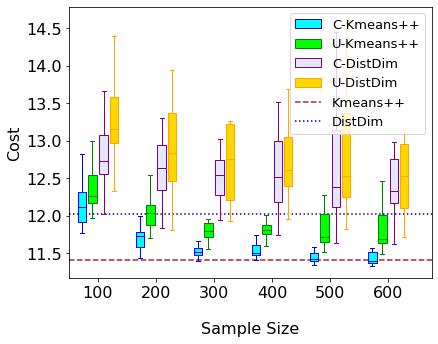

In [41]:
a1 = np.load('./res/kmeans/kc-kmeans-coreset-5c100s.npy')
b1 = np.load('./res/kmeans/kc-kmeans-coreset-5c200s.npy')
c1 = np.load('./res/kmeans/kc-kmeans-coreset-5c300s.npy')
d1 = np.load('./res/kmeans/kc-kmeans-coreset-5c400s.npy')
e1 = np.load('./res/kmeans/kc-kmeans-coreset-5c500s.npy')
f1 = np.load('./res/kmeans/kc-kmeans-coreset-5c600s.npy')

a2 = np.load('./res/kmeans/kc-distkmeans-coreset-5c100s.npy')
b2 = np.load('./res/kmeans/kc-distkmeans-coreset-5c200s.npy')
c2 = np.load('./res/kmeans/kc-distkmeans-coreset-5c300s.npy')
d2 = np.load('./res/kmeans/kc-distkmeans-coreset-5c400s.npy')
e2 = np.load('./res/kmeans/kc-distkmeans-coreset-5c500s.npy')
f2 = np.load('./res/kmeans/kc-distkmeans-coreset-5c600s.npy')

a3 = np.load('./res/kmeans/kc-kmeans-uniform-5c100s.npy')
b3 = np.load('./res/kmeans/kc-kmeans-uniform-5c200s.npy')
c3 = np.load('./res/kmeans/kc-kmeans-uniform-5c300s.npy')
d3 = np.load('./res/kmeans/kc-kmeans-uniform-5c400s.npy')
e3 = np.load('./res/kmeans/kc-kmeans-uniform-5c500s.npy')
f3 = np.load('./res/kmeans/kc-kmeans-uniform-5c600s.npy')

a4 = np.load('./res/kmeans/kc-distkmeans-uniform-5c100s.npy')
b4 = np.load('./res/kmeans/kc-distkmeans-uniform-5c200s.npy')
c4 = np.load('./res/kmeans/kc-distkmeans-uniform-5c300s.npy')
d4 = np.load('./res/kmeans/kc-distkmeans-uniform-5c400s.npy')
e4 = np.load('./res/kmeans/kc-distkmeans-uniform-5c500s.npy')
f4 = np.load('./res/kmeans/kc-distkmeans-uniform-5c600s.npy')

k = np.load('./res/kmeans/kc-kmeans-5c.npy')
d = np.load('./res/kmeans/kc-distkmeans-5c.npy')

k = np.mean(k)
d = np.mean(d)

data1 = [a1,b1,c1,d1,e1,f1]
data2 = [a2,b2,c2,d2,e2,f2]
data3 = [a3,b3,c3,d3,e3,f3]
data4 = [a4,b4,c4,d4,e4,f4]

ticks = ['100\n','200','300','400','500','600'] 

plt.figure(figsize=(6.5,5))

linek = plt.axhline(y=k, color='brown', linestyle='--')
lined = plt.axhline(y=d, color='navy', linestyle=':')

bp1 = plt.boxplot(data1, positions=np.array(range(len(data1)))*4.0-1.1, sym='', widths=0.6, patch_artist=True)
bp3 = plt.boxplot(data3, positions=np.array(range(len(data3)))*4.0-0.4, sym='', widths=0.6, patch_artist=True)
bp2 = plt.boxplot(data2, positions=np.array(range(len(data2)))*4.0+0.4, sym='', widths=0.6, patch_artist=True)
bp4 = plt.boxplot(data4, positions=np.array(range(len(data4)))*4.0+1.1, sym='', widths=0.6, patch_artist=True)
set_box_color(bp1, 'blue', 'cyan') # colors are from http://colorbrewer2.org/
set_box_color(bp2, 'purple', 'lavender')
set_box_color(bp3, 'green', 'lime')
set_box_color(bp4, 'orange', 'gold')

plt.xticks(range(0, len(ticks) * 4, 4), ticks, fontsize=16)
plt.xlim(-2, len(ticks)*4-1)
plt.yticks(fontsize=16)

plt.xlabel('Sample Size', fontsize=16)
plt.ylabel('Cost', fontsize=16)

plt.legend([bp1["boxes"][0], bp3["boxes"][0], bp2["boxes"][0], bp4["boxes"][0], linek, lined], \
           ['C-Kmeans++', 'U-Kmeans++', 'C-DistDim', 'U-DistDim', 'Kmeans++','DistDim'], loc='upper right', prop = {'size':13})

plt.savefig("kmeansds-kc.pdf", bbox_inches='tight')
plt.show()

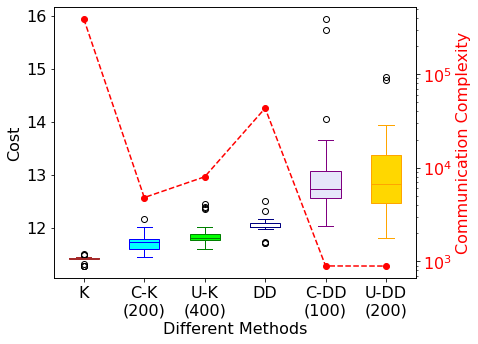

In [40]:
a = np.load("./res/kmeans/kc-kmeans-5c.npy")
b = np.load("./res/kmeans/kc-kmeans-coreset-5c200s.npy")
c = np.load("./res/kmeans/kc-kmeans-uniform-5c400s.npy")
d = np.load("./res/kmeans/kc-distkmeans-5c.npy")
e = np.load("./res/kmeans/kc-distkmeans-coreset-5c100s.npy")
f = np.load("./res/kmeans/kc-distkmeans-uniform-5c200s.npy")

a_comm = kmeans_comm(num_of_data, num_of_dim)
b_comm = coreset_kmeans_comm(200, num_of_party, num_of_dim)
c_comm = uniform_kmeans_comm(400, num_of_party, num_of_dim)
d_comm = distkmeans_comm(num_of_data, num_of_party, num_of_dim, num_of_center)
e_comm = coreset_distkmeans_comm(100, num_of_party, num_of_dim, num_of_center)
f_comm = uniform_distkmeans_comm(200, num_of_party, num_of_dim, num_of_center)

cost_seq = [a,b,c,d,e,f]
comm_seq = [a_comm,b_comm,c_comm,d_comm,e_comm,f_comm]
labels = ['K','C+K','U+K','D','C+D','U+D']

fig, ax1 = plt.subplots(figsize=(6.5,5))
ax1.set_xlabel('Different Methods',fontsize=16)
ax1.set_ylabel('Cost',fontsize=16)
#ax1.tick_params(axis='y', labelcolor='blue')
#bp = box_plot(cost_seq, ax1, labels, 'blue', 'white')
bp1 = ax1.boxplot([a], positions=[1], widths=0.5, patch_artist=True,labels=['K'])
bp2 = ax1.boxplot([b], positions=[2], widths=0.5, patch_artist=True,labels=['C-K\n(200)'])
bp3 = ax1.boxplot([c], positions=[3], widths=0.5, patch_artist=True,labels=['U-K\n(400)'])
bp4 = ax1.boxplot([d], positions=[4], widths=0.5, patch_artist=True,labels=['DD'])
bp5 = ax1.boxplot([e], positions=[5], widths=0.5, patch_artist=True,labels=['C-DD\n(100)'])
bp6 = ax1.boxplot([f], positions=[6], widths=0.5, patch_artist=True,labels=['U-DD\n(200)'])

set_box_color(bp1, 'brown', 'white')
set_box_color(bp2, 'blue', 'cyan')
set_box_color(bp3, 'green', 'lime')
set_box_color(bp4, 'navy', 'white')
set_box_color(bp5, 'purple', 'lavender')
set_box_color(bp6, 'orange', 'gold')

ax1.tick_params(axis='x',labelsize=16)
ax1.tick_params(axis='y',labelsize=16)

ax2 = ax1.twinx()
ax2.set_ylabel('Communication Complexity', color='red',fontsize=16)
ax2.set_yscale('log')
ax2.tick_params(axis='y', labelcolor='red',labelsize=16)
ax2.plot([1,2,3,4,5,6], comm_seq, 'ro--')
plt.savefig("kmeansdm-kc.pdf", bbox_inches='tight')
plt.show()

# Plot for Ridge Regression

In [16]:
def centralized_comm(n_data, n_dim):
    return n_data * n_dim

def uniform_comm(n_size, n_party):
    return n_size * n_party

def coreset_comm(n_size, n_party):
    return n_party + n_size * (3 * n_party)

def uniform_centralized_comm(n_size, n_party, n_dim):
    return uniform_comm(n_size, n_party) + centralized_comm(n_size, n_dim)

def coreset_centralized_comm(n_size, n_party, n_dim):
    return coreset_comm(n_size, n_party) + centralized_comm(n_size, n_dim)

def saga_comm(n_party, n_dim, n_iter):
    return  3 * n_party * n_iter

def uniform_saga_comm(n_size, n_party, n_dim, n_iter):
    return uniform_comm(n_size, n_party) + 2 * n_party * n_size + saga_comm(n_party, n_dim, n_iter * n_size)

def coreset_saga_comm(n_size, n_party, n_dim, n_iter):
    return coreset_comm(n_size, n_party) + 2 * n_party * n_size + saga_comm(n_party, n_dim, n_iter * n_size)

In [17]:
num_of_data = 463715
num_of_dim = 90
num_of_party = 3

7631.75
7973.65


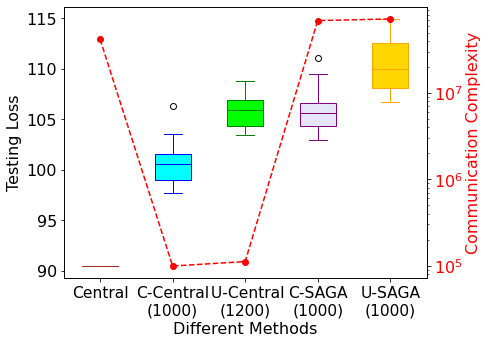

In [30]:
a = np.load("./res/ridge-res/ridge-centralized-test.npy")
b = np.load("./res/ridge-res/ridge-centralized-c1000s-test.npy")
c = np.load("./res/ridge-res/ridge-centralized-u1200s-test.npy")

e = np.load("./res/ridge-res/ridge-saga-c1000s-test.npy")
f = np.load("./res/ridge-res/ridge-saga-u1000s-test.npy")

e_iter = np.load("./res/ridge-res/ridge-saga-c1000s-iter.npy")
f_iter = np.load("./res/ridge-res/ridge-saga-u1000s-iter.npy")

e_iter = np.mean(e_iter)
f_iter = np.mean(f_iter)

print(e_iter)
print(f_iter)

a_comm = centralized_comm(num_of_data, num_of_dim)
b_comm = coreset_centralized_comm(1000, num_of_party, num_of_dim)
c_comm = uniform_centralized_comm(1200, num_of_party, num_of_dim)

e_comm = coreset_saga_comm(1000, num_of_party, num_of_dim, e_iter)
f_comm = uniform_saga_comm(1000, num_of_party, num_of_dim, f_iter)

cost_seq = [a,b,c,e,f]
comm_seq = [a_comm,b_comm,c_comm,e_comm,f_comm]

fig, ax1 = plt.subplots(figsize=(6.5,5))
ax1.set_xlabel('Different Methods',fontsize=16)
ax1.set_ylabel('Testing Loss',fontsize=16)
#ax1.tick_params(axis='y', labelcolor='blue')
#bp = box_plot(cost_seq, ax1, labels, 'blue', 'white')
bp1 = ax1.boxplot([a], positions=[1], widths=0.5, patch_artist=True,labels=['Central'])
bp2 = ax1.boxplot([b], positions=[2], widths=0.5, patch_artist=True,labels=['C-Central\n(1000)'])
bp3 = ax1.boxplot([c], positions=[3], widths=0.5, patch_artist=True,labels=[' U-Central\n(1200)'])

bp5 = ax1.boxplot([e], positions=[4], widths=0.5, patch_artist=True,labels=['C-SAGA\n(1000)'])
bp6 = ax1.boxplot([f], positions=[5], widths=0.5, patch_artist=True,labels=['U-SAGA\n(1000)'])

set_box_color(bp1, 'brown', 'white')
set_box_color(bp2, 'blue', 'cyan')
set_box_color(bp3, 'green', 'lime')

set_box_color(bp5, 'purple', 'lavender')
set_box_color(bp6, 'orange', 'gold')

ax1.tick_params(axis='x',labelsize=15.5)
ax1.tick_params(axis='y',labelsize=16)

ax2 = ax1.twinx()
ax2.set_ylabel('Communication Complexity', color='red',fontsize=16)
ax2.set_yscale('log')
ax2.tick_params(axis='y', labelcolor='red',labelsize=16)
ax2.plot([1,2,3,4,5], comm_seq, 'ro--')
plt.savefig("ridgedm.pdf", bbox_inches='tight')
plt.show()

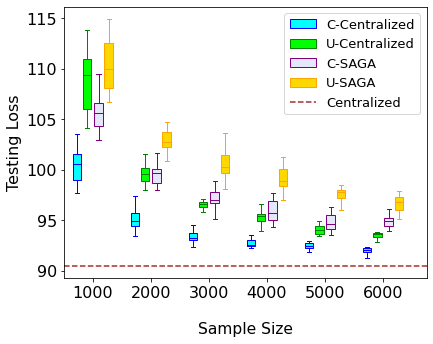

In [31]:
a1 = np.load('./res/ridge-res/ridge-centralized-c1000s-test.npy')
b1 = np.load('./res/ridge-res/ridge-centralized-c2000s-test.npy')
c1 = np.load('./res/ridge-res/ridge-centralized-c3000s-test.npy')
d1 = np.load('./res/ridge-res/ridge-centralized-c4000s-test.npy')
e1 = np.load('./res/ridge-res/ridge-centralized-c5000s-test.npy')
f1 = np.load('./res/ridge-res/ridge-centralized-c6000s-test.npy')

a2 = np.load('./res/ridge-res/ridge-saga-c1000s-test.npy')
b2 = np.load('./res/ridge-res/ridge-saga-c2000s-test.npy')
c2 = np.load('./res/ridge-res/ridge-saga-c3000s-test.npy')
d2 = np.load('./res/ridge-res/ridge-saga-c4000s-test.npy')
e2 = np.load('./res/ridge-res/ridge-saga-c5000s-test.npy')
f2 = np.load('./res/ridge-res/ridge-saga-c6000s-test.npy')

a3 = np.load('./res/ridge-res/ridge-centralized-u1000s-test.npy')
b3 = np.load('./res/ridge-res/ridge-centralized-u2000s-test.npy')
c3 = np.load('./res/ridge-res/ridge-centralized-u3000s-test.npy')
d3 = np.load('./res/ridge-res/ridge-centralized-u4000s-test.npy')
e3 = np.load('./res/ridge-res/ridge-centralized-u5000s-test.npy')
f3 = np.load('./res/ridge-res/ridge-centralized-u6000s-test.npy')

a4 = np.load('./res/ridge-res/ridge-saga-u1000s-test.npy')
b4 = np.load('./res/ridge-res/ridge-saga-u2000s-test.npy')
c4 = np.load('./res/ridge-res/ridge-saga-u3000s-test.npy')
d4 = np.load('./res/ridge-res/ridge-saga-u4000s-test.npy')
e4 = np.load('./res/ridge-res/ridge-saga-u5000s-test.npy')
f4 = np.load('./res/ridge-res/ridge-saga-u6000s-test.npy')


k = np.load('./res/ridge-res/ridge-centralized-test.npy')

k = np.mean(k)

data1 = [a1,b1,c1,d1,e1,f1]
data2 = [a2,b2,c2,d2,e2,f2]
data3 = [a3,b3,c3,d3,e3,f3]
data4 = [a4,b4,c4,d4,e4,f4]

ticks = ['1000\n','2000','3000','4000','5000','6000'] 

plt.figure(figsize=(6.5,5))

linek = plt.axhline(y=k, color='brown', linestyle='--')

bp1 = plt.boxplot(data1, positions=np.array(range(len(data1)))*4.0-1.1, sym='', widths=0.6, patch_artist=True)
bp3 = plt.boxplot(data3, positions=np.array(range(len(data3)))*4.0-0.4, sym='', widths=0.6, patch_artist=True)
bp2 = plt.boxplot(data2, positions=np.array(range(len(data2)))*4.0+0.4, sym='', widths=0.6, patch_artist=True)
bp4 = plt.boxplot(data4, positions=np.array(range(len(data4)))*4.0+1.1, sym='', widths=0.6, patch_artist=True)
set_box_color(bp1, 'blue', 'cyan') # colors are from http://colorbrewer2.org/
set_box_color(bp2, 'purple', 'lavender')
set_box_color(bp3, 'green', 'lime')
set_box_color(bp4, 'orange', 'gold')

plt.xticks(range(0, len(ticks) * 4, 4), ticks, fontsize=16)
plt.xlim(-2, len(ticks)*4-1)
plt.yticks(fontsize=16)

plt.xlabel('Sample Size', fontsize=15.5)
plt.ylabel('Testing Loss', fontsize=16)

plt.legend([bp1["boxes"][0], bp3["boxes"][0], bp2["boxes"][0], bp4["boxes"][0], linek], \
           ['C-Centralized', 'U-Centralized', 'C-SAGA', 'U-SAGA', 'Centralized'], loc='upper right', prop = {'size':13})

plt.savefig("ridgeds.pdf", bbox_inches='tight')
plt.show()

In [14]:
e_iter = []
f_iter = []
for i in range(6):
    namestr1 = "./res/ridge-res/ridge-saga-c"+str((i+1)*1000)+"s-iter.npy"
    namestr2 = "./res/ridge-res/ridge-saga-u"+str((i+1)*1000)+"s-iter.npy"
    e_iter_c = np.load(namestr1)
    e_iter.append(e_iter_c)
    f_iter_c = np.load(namestr2)
    f_iter.append(f_iter_c)

In [19]:
for i in range(0,6):
    d = data2[i]
    print("C-SAGA(%d) mean : %f, std: %f, commu: %d, iters: %d, coreset commu frac: %f" % ((i+1)*1000,np.mean(d), np.std(d), coreset_saga_comm((i+1)*1000, num_of_party, num_of_dim, np.floor(np.mean(e_iter[i]))), np.floor(np.mean(e_iter[i])),
                                                                                          coreset_comm((i+1)*1000, num_of_party) / coreset_saga_comm((i+1)*1000, num_of_party, num_of_dim, np.floor(np.mean(e_iter[i])))))
    
for i in range(0,6):
    d = data4[i]
    print("U-SAGA(%d) mean : %f, std: %f, commu: %d, uniform commu frac: %f" % ((i+1)*1000,np.mean(d), np.std(d), uniform_saga_comm((i+1)*1000, num_of_party, num_of_dim, np.floor(np.mean(f_iter[i]))),
                                                                               uniform_comm((i+1)*1000, num_of_party) / uniform_saga_comm((i+1)*1000, num_of_party, num_of_dim, np.floor(np.mean(f_iter[i])))))

C-SAGA(1000) mean : 77.754908, std: 1.781745, commu: 68694003, iters: 7631, coreset commu frac: 0.000131
C-SAGA(2000) mean : 76.320309, std: 0.847233, commu: 135624003, iters: 7533, coreset commu frac: 0.000133
C-SAGA(3000) mean : 75.519049, std: 0.640200, commu: 193689003, iters: 7172, coreset commu frac: 0.000139
C-SAGA(4000) mean : 75.489585, std: 0.447812, commu: 252168003, iters: 7003, coreset commu frac: 0.000143
C-SAGA(5000) mean : 75.271523, std: 0.495807, commu: 297390003, iters: 6607, coreset commu frac: 0.000151
C-SAGA(6000) mean : 75.316822, std: 0.325198, commu: 361512003, iters: 6693, coreset commu frac: 0.000149
U-SAGA(1000) mean : 78.865968, std: 1.438469, commu: 71766000, uniform commu frac: 0.000042
U-SAGA(2000) mean : 78.125983, std: 2.095791, commu: 159192000, uniform commu frac: 0.000038
U-SAGA(3000) mean : 77.850210, std: 2.234534, commu: 241731000, uniform commu frac: 0.000037
U-SAGA(4000) mean : 76.697135, std: 1.266436, commu: 325764000, uniform commu frac: 0.0

In [15]:
# Different number of parties

In [27]:
num_of_data = 463715
num_of_dim = 90
num_of_party = 5

7863.6
7973.65


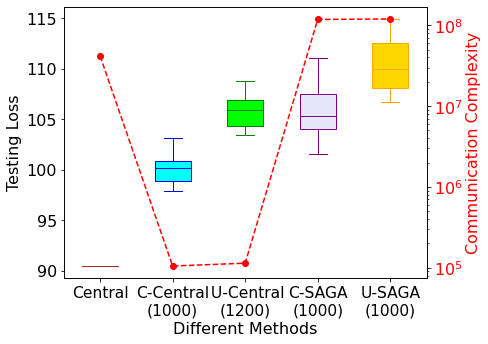

In [28]:
a = np.load("./res/ridge-res/ridge-centralized-test.npy")
b = np.load("./res/ridge/ridge-centralized-c1000s5p-test.npy")
c = np.load("./res/ridge-res/ridge-centralized-u1200s-test.npy")

e = np.load("./res/ridge/ridge-saga-c1000s5p-test.npy")
f = np.load("./res/ridge-res/ridge-saga-u1000s-test.npy")

e_iter = np.load("./res/ridge/ridge-saga-c1000s5p-iter.npy")
f_iter = np.load("./res/ridge-res/ridge-saga-u1000s-iter.npy")

e_iter = np.mean(e_iter)
f_iter = np.mean(f_iter)

print(e_iter)
print(f_iter)

a_comm = centralized_comm(num_of_data, num_of_dim)
b_comm = coreset_centralized_comm(1000, num_of_party, num_of_dim)
c_comm = uniform_centralized_comm(1200, num_of_party, num_of_dim)

e_comm = coreset_saga_comm(1000, num_of_party, num_of_dim, e_iter)
f_comm = uniform_saga_comm(1000, num_of_party, num_of_dim, f_iter)

cost_seq = [a,b,c,e,f]
comm_seq = [a_comm,b_comm,c_comm,e_comm,f_comm]

fig, ax1 = plt.subplots(figsize=(6.5,5))
ax1.set_xlabel('Different Methods',fontsize=16)
ax1.set_ylabel('Testing Loss',fontsize=16)
#ax1.tick_params(axis='y', labelcolor='blue')
#bp = box_plot(cost_seq, ax1, labels, 'blue', 'white')
bp1 = ax1.boxplot([a], positions=[1], widths=0.5, patch_artist=True,labels=['Central'])
bp2 = ax1.boxplot([b], positions=[2], widths=0.5, patch_artist=True,labels=['C-Central\n(1000)'])
bp3 = ax1.boxplot([c], positions=[3], widths=0.5, patch_artist=True,labels=[' U-Central\n(1200)'])

bp5 = ax1.boxplot([e], positions=[4], widths=0.5, patch_artist=True,labels=['C-SAGA\n(1000)'])
bp6 = ax1.boxplot([f], positions=[5], widths=0.5, patch_artist=True,labels=['U-SAGA\n(1000)'])

set_box_color(bp1, 'brown', 'white')
set_box_color(bp2, 'blue', 'cyan')
set_box_color(bp3, 'green', 'lime')

set_box_color(bp5, 'purple', 'lavender')
set_box_color(bp6, 'orange', 'gold')

ax1.tick_params(axis='x',labelsize=15.5)
ax1.tick_params(axis='y',labelsize=16)

ax2 = ax1.twinx()
ax2.set_ylabel('Communication Complexity', color='red',fontsize=16)
ax2.set_yscale('log')
ax2.tick_params(axis='y', labelcolor='red',labelsize=16)
ax2.plot([1,2,3,4,5], comm_seq, 'ro--')
plt.savefig("ridgedm5p.pdf", bbox_inches='tight')
plt.show()

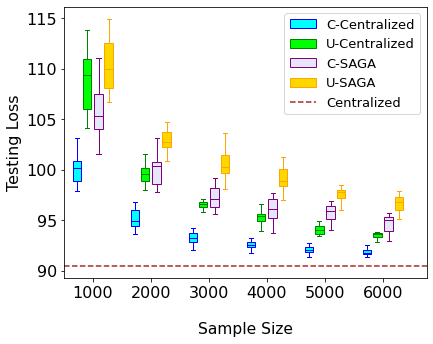

In [32]:
a1 = np.load('./res/ridge/ridge-centralized-c1000s5p-test.npy')
b1 = np.load('./res/ridge/ridge-centralized-c2000s5p-test.npy')
c1 = np.load('./res/ridge/ridge-centralized-c3000s5p-test.npy')
d1 = np.load('./res/ridge/ridge-centralized-c4000s5p-test.npy')
e1 = np.load('./res/ridge/ridge-centralized-c5000s5p-test.npy')
f1 = np.load('./res/ridge/ridge-centralized-c6000s5p-test.npy')

a2 = np.load('./res/ridge/ridge-saga-c1000s5p-test.npy')
b2 = np.load('./res/ridge/ridge-saga-c2000s5p-test.npy')
c2 = np.load('./res/ridge/ridge-saga-c3000s5p-test.npy')
d2 = np.load('./res/ridge/ridge-saga-c4000s5p-test.npy')
e2 = np.load('./res/ridge/ridge-saga-c5000s5p-test.npy')
f2 = np.load('./res/ridge/ridge-saga-c6000s5p-test.npy')

a3 = np.load('./res/ridge-res/ridge-centralized-u1000s-test.npy')
b3 = np.load('./res/ridge-res/ridge-centralized-u2000s-test.npy')
c3 = np.load('./res/ridge-res/ridge-centralized-u3000s-test.npy')
d3 = np.load('./res/ridge-res/ridge-centralized-u4000s-test.npy')
e3 = np.load('./res/ridge-res/ridge-centralized-u5000s-test.npy')
f3 = np.load('./res/ridge-res/ridge-centralized-u6000s-test.npy')

a4 = np.load('./res/ridge-res/ridge-saga-u1000s-test.npy')
b4 = np.load('./res/ridge-res/ridge-saga-u2000s-test.npy')
c4 = np.load('./res/ridge-res/ridge-saga-u3000s-test.npy')
d4 = np.load('./res/ridge-res/ridge-saga-u4000s-test.npy')
e4 = np.load('./res/ridge-res/ridge-saga-u5000s-test.npy')
f4 = np.load('./res/ridge-res/ridge-saga-u6000s-test.npy')


k = np.load('./res/ridge-res/ridge-centralized-test.npy')

k = np.mean(k)

data1 = [a1,b1,c1,d1,e1,f1]
data2 = [a2,b2,c2,d2,e2,f2]
data3 = [a3,b3,c3,d3,e3,f3]
data4 = [a4,b4,c4,d4,e4,f4]

ticks = ['1000\n','2000','3000','4000','5000','6000'] 

plt.figure(figsize=(6.5,5))

linek = plt.axhline(y=k, color='brown', linestyle='--')

bp1 = plt.boxplot(data1, positions=np.array(range(len(data1)))*4.0-1.1, sym='', widths=0.6, patch_artist=True)
bp3 = plt.boxplot(data3, positions=np.array(range(len(data3)))*4.0-0.4, sym='', widths=0.6, patch_artist=True)
bp2 = plt.boxplot(data2, positions=np.array(range(len(data2)))*4.0+0.4, sym='', widths=0.6, patch_artist=True)
bp4 = plt.boxplot(data4, positions=np.array(range(len(data4)))*4.0+1.1, sym='', widths=0.6, patch_artist=True)
set_box_color(bp1, 'blue', 'cyan') # colors are from http://colorbrewer2.org/
set_box_color(bp2, 'purple', 'lavender')
set_box_color(bp3, 'green', 'lime')
set_box_color(bp4, 'orange', 'gold')

plt.xticks(range(0, len(ticks) * 4, 4), ticks, fontsize=16)
plt.xlim(-2, len(ticks)*4-1)
plt.yticks(fontsize=16)

plt.xlabel('Sample Size', fontsize=15.5)
plt.ylabel('Testing Loss', fontsize=16)

plt.legend([bp1["boxes"][0], bp3["boxes"][0], bp2["boxes"][0], bp4["boxes"][0], linek], \
           ['C-Centralized', 'U-Centralized', 'C-SAGA', 'U-SAGA', 'Centralized'], loc='upper right', prop = {'size':13})

plt.savefig("ridgeds5p.pdf", bbox_inches='tight')
plt.show()

In [ ]:
# Plot with different regularizer

In [149]:
num_of_data = 463715
num_of_dim = 90
num_of_party = 3

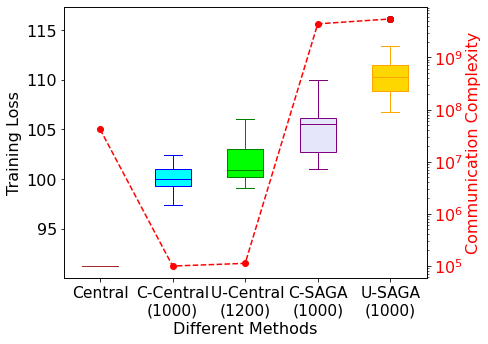

In [150]:
a = np.load("./res/lr/lr-centralized-train.npy")
b = np.load("./res/lr/lr-centralized-c1000s-train.npy")
c = np.load("./res/lr/lr-centralized-u1200s-train.npy")

e = np.load("./res/lr/lr-saga-c1000s-train.npy")
f = np.load("./res/lr/lr-saga-u1000s-train.npy")

e_iter = np.load("./res/lr/lr-saga-c1000s-iter.npy")
f_iter = np.load("./res/lr/lr-saga-u1000s-iter.npy")

e_iter = np.mean(e_iter)
f_iter = np.mean(f_iter)


a_comm = centralized_comm(num_of_data, num_of_dim)
b_comm = coreset_centralized_comm(1000, num_of_party, num_of_dim)
c_comm = uniform_centralized_comm(1200, num_of_party, num_of_dim)

e_comm = coreset_saga_comm(1000, num_of_party, num_of_dim, e_iter * 1000)
f_comm = uniform_saga_comm(1000, num_of_party, num_of_dim, f_iter * 1000)

cost_seq = [a,b,c,e,f]
comm_seq = [a_comm,b_comm,c_comm,e_comm,f_comm]

fig, ax1 = plt.subplots(figsize=(6.5,5))
ax1.set_xlabel('Different Methods',fontsize=16)
ax1.set_ylabel('Training Loss',fontsize=16)
#ax1.tick_params(axis='y', labelcolor='blue')
#bp = box_plot(cost_seq, ax1, labels, 'blue', 'white')
bp1 = ax1.boxplot([a], positions=[1], widths=0.5, patch_artist=True,labels=['Central'])
bp2 = ax1.boxplot([b], positions=[2], widths=0.5, patch_artist=True,labels=['C-Central\n(1000)'])
bp3 = ax1.boxplot([c], positions=[3], widths=0.5, patch_artist=True,labels=[' U-Central\n(1200)'])

bp5 = ax1.boxplot([e], positions=[4], widths=0.5, patch_artist=True,labels=['C-SAGA\n(1000)'])
bp6 = ax1.boxplot([f], positions=[5], widths=0.5, patch_artist=True,labels=['U-SAGA\n(1000)'])


set_box_color(bp1, 'brown', 'white')
set_box_color(bp2, 'blue', 'cyan')
set_box_color(bp3, 'green', 'lime')

set_box_color(bp5, 'purple', 'lavender')
set_box_color(bp6, 'orange', 'gold')


ax1.tick_params(axis='x',labelsize=15.5)
ax1.tick_params(axis='y',labelsize=16)

ax2 = ax1.twinx()
ax2.set_ylabel('Communication Complexity', color='red',fontsize=16)
ax2.set_yscale('log')
ax2.tick_params(axis='y', labelcolor='red',labelsize=16)
ax2.plot([1,2,3,4,5], comm_seq, 'ro--')
plt.savefig("lrdm.pdf", bbox_inches='tight')
plt.show()

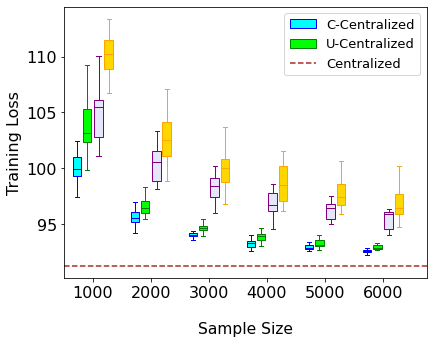

In [151]:
a1 = np.load('./res/lr/lr-centralized-c1000s-train.npy')
b1 = np.load('./res/lr/lr-centralized-c2000s-train.npy')
c1 = np.load('./res/lr/lr-centralized-c3000s-train.npy')
d1 = np.load('./res/lr/lr-centralized-c4000s-train.npy')
e1 = np.load('./res/lr/lr-centralized-c5000s-train.npy')
f1 = np.load('./res/lr/lr-centralized-c6000s-train.npy')

a2 = np.load('./res/lr/lr-saga-c1000s-train.npy')
b2 = np.load('./res/lr/lr-saga-c2000s-train.npy')
c2 = np.load('./res/lr/lr-saga-c3000s-train.npy')
d2 = np.load('./res/lr/lr-saga-c4000s-train.npy')
e2 = np.load('./res/lr/lr-saga-c5000s-train.npy')
f2 = np.load('./res/lr/lr-saga-c6000s-train.npy')


a3 = np.load('./res/lr/lr-centralized-u1000s-train.npy')
b3 = np.load('./res/lr/lr-centralized-u2000s-train.npy')
c3 = np.load('./res/lr/lr-centralized-u3000s-train.npy')
d3 = np.load('./res/lr/lr-centralized-u4000s-train.npy')
e3 = np.load('./res/lr/lr-centralized-u5000s-train.npy')
f3 = np.load('./res/lr/lr-centralized-u6000s-train.npy')

a4 = np.load('./res/lr/lr-saga-u1000s-train.npy')
b4 = np.load('./res/lr/lr-saga-u2000s-train.npy')
c4 = np.load('./res/lr/lr-saga-u3000s-train.npy')
d4 = np.load('./res/lr/lr-saga-u4000s-train.npy')
e4 = np.load('./res/lr/lr-saga-u5000s-train.npy')
f4 = np.load('./res/lr/lr-saga-u6000s-train.npy')


k = np.load('./res/lr/lr-centralized-train.npy')

k = np.mean(k)

data1 = [a1,b1,c1,d1,e1,f1]
data2 = [a2,b2,c2,d2,e2,f2]
data3 = [a3,b3,c3,d3,e3,f3]
data4 = [a4,b4,c4,d4,e4,f4]

ticks = ['1000\n','2000','3000','4000','5000','6000'] 

plt.figure(figsize=(6.5,5))

linek = plt.axhline(y=k, color='brown', linestyle='--')

bp1 = plt.boxplot(data1, positions=np.array(range(len(data1)))*4.0-1.1, sym='', widths=0.6, patch_artist=True)
bp3 = plt.boxplot(data3, positions=np.array(range(len(data3)))*4.0-0.4, sym='', widths=0.6, patch_artist=True)
bp2 = plt.boxplot(data2, positions=np.array(range(len(data1)))*4.0+0.4, sym='', widths=0.6, patch_artist=True)
bp4 = plt.boxplot(data4, positions=np.array(range(len(data1)))*4.0+1.1, sym='', widths=0.6, patch_artist=True)

set_box_color(bp1, 'blue', 'cyan') # colors are from http://colorbrewer2.org/
set_box_color(bp2, 'purple', 'lavender')
set_box_color(bp3, 'green', 'lime')
set_box_color(bp4, 'orange', 'gold')

plt.xticks(range(0, len(ticks) * 4, 4), ticks, fontsize=16)
plt.xlim(-2, len(ticks)*4-1)
plt.yticks(fontsize=16)

plt.xlabel('Sample Size', fontsize=15.5)
plt.ylabel('Training Loss', fontsize=16)

plt.legend([bp1["boxes"][0], bp3["boxes"][0], linek], \
           ['C-Centralized', 'U-Centralized', 'Centralized'], loc='upper right', prop = {'size':13})

plt.savefig("lrds.pdf", bbox_inches='tight')
plt.show()

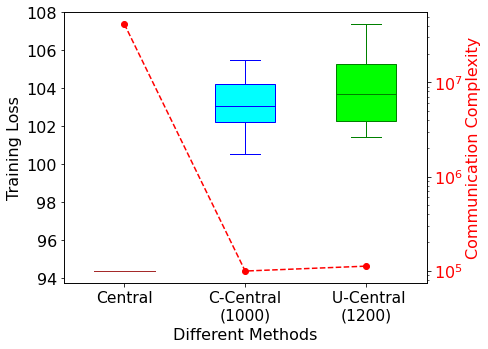

In [152]:
a = np.load("./res/lasso/lasso-centralized-train.npy")
b = np.load("./res/lasso/lasso-centralized-c1000s-train.npy")
c = np.load("./res/lasso/lasso-centralized-u1200s-train.npy")


a_comm = centralized_comm(num_of_data, num_of_dim)
b_comm = coreset_centralized_comm(1000, num_of_party, num_of_dim)
c_comm = uniform_centralized_comm(1200, num_of_party, num_of_dim)

cost_seq = [a,b,c]
comm_seq = [a_comm,b_comm,c_comm]

fig, ax1 = plt.subplots(figsize=(6.5,5))
ax1.set_xlabel('Different Methods',fontsize=16)
ax1.set_ylabel('Training Loss',fontsize=16)
#ax1.tick_params(axis='y', labelcolor='blue')
#bp = box_plot(cost_seq, ax1, labels, 'blue', 'white')
bp1 = ax1.boxplot([a], positions=[1], widths=0.5, patch_artist=True,labels=['Central'])
bp2 = ax1.boxplot([b], positions=[2], widths=0.5, patch_artist=True,labels=['C-Central\n(1000)'])
bp3 = ax1.boxplot([c], positions=[3], widths=0.5, patch_artist=True,labels=[' U-Central\n(1200)'])



set_box_color(bp1, 'brown', 'white')
set_box_color(bp2, 'blue', 'cyan')
set_box_color(bp3, 'green', 'lime')



ax1.tick_params(axis='x',labelsize=15.5)
ax1.tick_params(axis='y',labelsize=16)

ax2 = ax1.twinx()
ax2.set_ylabel('Communication Complexity', color='red',fontsize=16)
ax2.set_yscale('log')
ax2.tick_params(axis='y', labelcolor='red',labelsize=16)
ax2.plot([1,2,3], comm_seq, 'ro--')
plt.savefig("lassodm.pdf", bbox_inches='tight')
plt.show()

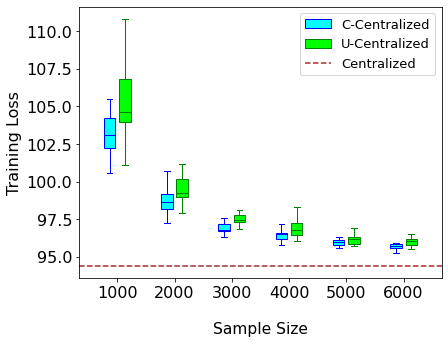

In [153]:
a1 = np.load('./res/lasso/lasso-centralized-c1000s-train.npy')
b1 = np.load('./res/lasso/lasso-centralized-c2000s-train.npy')
c1 = np.load('./res/lasso/lasso-centralized-c3000s-train.npy')
d1 = np.load('./res/lasso/lasso-centralized-c4000s-train.npy')
e1 = np.load('./res/lasso/lasso-centralized-c5000s-train.npy')
f1 = np.load('./res/lasso/lasso-centralized-c6000s-train.npy')


a3 = np.load('./res/lasso/lasso-centralized-u1000s-train.npy')
b3 = np.load('./res/lasso/lasso-centralized-u2000s-train.npy')
c3 = np.load('./res/lasso/lasso-centralized-u3000s-train.npy')
d3 = np.load('./res/lasso/lasso-centralized-u4000s-train.npy')
e3 = np.load('./res/lasso/lasso-centralized-u5000s-train.npy')
f3 = np.load('./res/lasso/lasso-centralized-u6000s-train.npy')


k = np.load('./res/lasso/lasso-centralized-train.npy')

k = np.mean(k)

data1 = [a1,b1,c1,d1,e1,f1]
data3 = [a3,b3,c3,d3,e3,f3]

ticks = ['1000\n','2000','3000','4000','5000','6000'] 

plt.figure(figsize=(6.5,5))

linek = plt.axhline(y=k, color='brown', linestyle='--')

bp1 = plt.boxplot(data1, positions=np.array(range(len(data1)))*3.0-0.4, sym='', widths=0.6, patch_artist=True)
bp3 = plt.boxplot(data3, positions=np.array(range(len(data3)))*3.0+0.4, sym='', widths=0.6, patch_artist=True)

set_box_color(bp1, 'blue', 'cyan') # colors are from http://colorbrewer2.org/

set_box_color(bp3, 'green', 'lime')

plt.xticks(range(0, len(ticks) * 3, 3), ticks, fontsize=16)
plt.xlim(-2, len(ticks)*3-1)
plt.yticks(fontsize=16)

plt.xlabel('Sample Size', fontsize=15.5)
plt.ylabel('Training Loss', fontsize=16)

plt.legend([bp1["boxes"][0], bp3["boxes"][0], linek], \
           ['C-Centralized', 'U-Centralized', 'Centralized'], loc='upper right', prop = {'size':13})

plt.savefig("lassods.pdf", bbox_inches='tight')
plt.show()

### Elastic Net

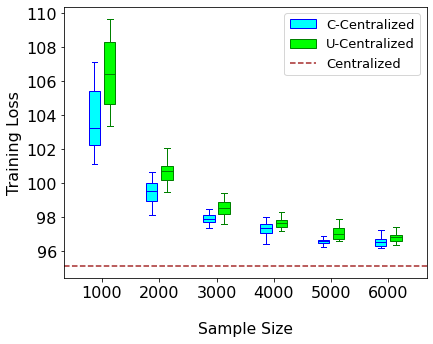

In [154]:
a1 = np.load('./res/en/en-centralized-c1000s-train.npy')
b1 = np.load('./res/en/en-centralized-c2000s-train.npy')
c1 = np.load('./res/en/en-centralized-c3000s-train.npy')
d1 = np.load('./res/en/en-centralized-c4000s-train.npy')
e1 = np.load('./res/en/en-centralized-c5000s-train.npy')
f1 = np.load('./res/en/en-centralized-c6000s-train.npy')


a3 = np.load('./res/en/en-centralized-u1000s-train.npy')
b3 = np.load('./res/en/en-centralized-u2000s-train.npy')
c3 = np.load('./res/en/en-centralized-u3000s-train.npy')
d3 = np.load('./res/en/en-centralized-u4000s-train.npy')
e3 = np.load('./res/en/en-centralized-u5000s-train.npy')
f3 = np.load('./res/en/en-centralized-u6000s-train.npy')


k = np.load('./res/en/en-centralized-train.npy')

k = np.mean(k)

data1 = [a1,b1,c1,d1,e1,f1]
data3 = [a3,b3,c3,d3,e3,f3]

ticks = ['1000\n','2000','3000','4000','5000','6000'] 

plt.figure(figsize=(6.5,5))

linek = plt.axhline(y=k, color='brown', linestyle='--')

bp1 = plt.boxplot(data1, positions=np.array(range(len(data1)))*3.0-0.4, sym='', widths=0.6, patch_artist=True)
bp3 = plt.boxplot(data3, positions=np.array(range(len(data3)))*3.0+0.4, sym='', widths=0.6, patch_artist=True)

set_box_color(bp1, 'blue', 'cyan') # colors are from http://colorbrewer2.org/

set_box_color(bp3, 'green', 'lime')

plt.xticks(range(0, len(ticks) * 3, 3), ticks, fontsize=16)
plt.xlim(-2, len(ticks)*3-1)
plt.yticks(fontsize=16)

plt.xlabel('Sample Size', fontsize=15.5)
plt.ylabel('Training Loss', fontsize=16)

plt.legend([bp1["boxes"][0], bp3["boxes"][0], linek], \
           ['C-Centralized', 'U-Centralized', 'Centralized'], loc='upper right', prop = {'size':13})

plt.savefig("ends.pdf", bbox_inches='tight')
plt.show()

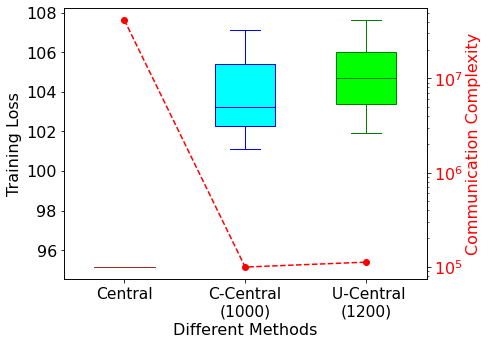

In [155]:
a = np.load("./res/en/en-centralized-train.npy")
b = np.load("./res/en/en-centralized-c1000s-train.npy")
c = np.load("./res/en/en-centralized-u1200s-train.npy")


a_comm = centralized_comm(num_of_data, num_of_dim)
b_comm = coreset_centralized_comm(1000, num_of_party, num_of_dim)
c_comm = uniform_centralized_comm(1200, num_of_party, num_of_dim)

cost_seq = [a,b,c]
comm_seq = [a_comm,b_comm,c_comm]

fig, ax1 = plt.subplots(figsize=(6.5,5))
ax1.set_xlabel('Different Methods',fontsize=16)
ax1.set_ylabel('Training Loss',fontsize=16)
#ax1.tick_params(axis='y', labelcolor='blue')
#bp = box_plot(cost_seq, ax1, labels, 'blue', 'white')
bp1 = ax1.boxplot([a], positions=[1], widths=0.5, patch_artist=True,labels=['Central'])
bp2 = ax1.boxplot([b], positions=[2], widths=0.5, patch_artist=True,labels=['C-Central\n(1000)'])
bp3 = ax1.boxplot([c], positions=[3], widths=0.5, patch_artist=True,labels=[' U-Central\n(1200)'])



set_box_color(bp1, 'brown', 'white')
set_box_color(bp2, 'blue', 'cyan')
set_box_color(bp3, 'green', 'lime')



ax1.tick_params(axis='x',labelsize=15.5)
ax1.tick_params(axis='y',labelsize=16)

ax2 = ax1.twinx()
ax2.set_ylabel('Communication Complexity', color='red',fontsize=16)
ax2.set_yscale('log')
ax2.tick_params(axis='y', labelcolor='red',labelsize=16)
ax2.plot([1,2,3], comm_seq, 'ro--')
plt.savefig("endm.pdf", bbox_inches='tight')
plt.show()

In [12]:
a1 = np.load('./res/ridge-kc/ridge-centralized-c100s-test.npy')
b1 = np.load('./res/ridge-kc/ridge-centralized-c200s-test.npy')
c1 = np.load('./res/ridge-kc/ridge-centralized-c300s-test.npy')
d1 = np.load('./res/ridge-kc/ridge-centralized-c400s-test.npy')
e1 = np.load('./res/ridge-kc/ridge-centralized-c500s-test.npy')
f1 = np.load('./res/ridge-kc/ridge-centralized-c600s-test.npy')

a2 = np.load('./res/ridge-kc/ridge-saga-c100s-test.npy')
b2 = np.load('./res/ridge-kc/ridge-saga-c200s-test.npy')
c2 = np.load('./res/ridge-kc/ridge-saga-c300s-test.npy')
d2 = np.load('./res/ridge-kc/ridge-saga-c400s-test.npy')
e2 = np.load('./res/ridge-kc/ridge-saga-c500s-test.npy')
f2 = np.load('./res/ridge-kc/ridge-saga-c600s-test.npy')

a3 = np.load('./res/ridge-kc/ridge-centralized-u100s-test.npy')
b3 = np.load('./res/ridge-kc/ridge-centralized-u200s-test.npy')
c3 = np.load('./res/ridge-kc/ridge-centralized-u300s-test.npy')
d3 = np.load('./res/ridge-kc/ridge-centralized-u400s-test.npy')
e3 = np.load('./res/ridge-kc/ridge-centralized-u500s-test.npy')
f3 = np.load('./res/ridge-kc/ridge-centralized-u600s-test.npy')

a4 = np.load('./res/ridge-kc/ridge-saga-u100s-test.npy')
b4 = np.load('./res/ridge-kc/ridge-saga-u200s-test.npy')
c4 = np.load('./res/ridge-kc/ridge-saga-u300s-test.npy')
d4 = np.load('./res/ridge-kc/ridge-saga-u400s-test.npy')
e4 = np.load('./res/ridge-kc/ridge-saga-u500s-test.npy')
f4 = np.load('./res/ridge-kc/ridge-saga-u600s-test.npy')


k = np.load('./res/ridge-kc/ridge-centralized-test.npy')

k = np.mean(k)

data1 = [a1,b1,c1,d1,e1,f1]
data2 = [a2,b2,c2,d2,e2,f2]
data3 = [a3,b3,c3,d3,e3,f3]
data4 = [a4,b4,c4,d4,e4,f4]

e_iter = []
f_iter = []
for i in range(6):
    namestr1 = "./res/ridge-res/ridge-saga-c"+str((i+1)*1000)+"s-iter.npy"
    namestr2 = "./res/ridge-res/ridge-saga-u"+str((i+1)*1000)+"s-iter.npy"
    e_iter_c = np.load(namestr1)
    e_iter.append(e_iter_c)
    f_iter_c = np.load(namestr2)
    f_iter.append(f_iter_c)
    
print("Central mean : %f, std: %f, commu: %d" % (np.mean(k), np.std(k),centralized_comm(num_of_data, num_of_dim)))
for i in range(0,6):
    d = data1[i]
    print("C-Central(%d) mean : %f, std: %f, commu: %d" % ((i+1)*100,np.mean(d), np.std(d), coreset_centralized_comm((i+1)*100, num_of_party, num_of_dim)))
    
for i in range(0,6):
    d = data3[i]
    print("U-Central(%d) mean : %f, std: %f, commu: %d" % ((i+1)*100,np.mean(d), np.std(d), uniform_centralized_comm((i+1)*100, num_of_party, num_of_dim)))

Central mean : 0.000000, std: 0.000000, commu: 41734350
C-Central(100) mean : 0.000000, std: 0.000000, commu: 9903
C-Central(200) mean : 0.000000, std: 0.000000, commu: 19803
C-Central(300) mean : 0.000000, std: 0.000000, commu: 29703
C-Central(400) mean : 0.000000, std: 0.000000, commu: 39603
C-Central(500) mean : 0.000000, std: 0.000000, commu: 49503
C-Central(600) mean : 0.000000, std: 0.000000, commu: 59403
U-Central(100) mean : 0.000000, std: 0.000000, commu: 9300
U-Central(200) mean : 0.000000, std: 0.000000, commu: 18600
U-Central(300) mean : 0.000000, std: 0.000000, commu: 27900
U-Central(400) mean : 0.000000, std: 0.000000, commu: 37200
U-Central(500) mean : 0.000000, std: 0.000000, commu: 46500
U-Central(600) mean : 0.000000, std: 0.000000, commu: 55800


In [22]:
for i in range(0,6):
    d = data2[i]
    print("C-SAGA(%d) mean : %f, std: %f, commu: %d" % ((i+1)*1000,np.mean(d), np.std(d), coreset_saga_comm((i+1)*1000, num_of_party, num_of_dim, np.floor(np.mean(e_iter[i])))))
    
for i in range(0,6):
    d = data4[i]
    print("U-SAGA(%d) mean : %f, std: %f, commu: %d" % ((i+1)*1000,np.mean(d), np.std(d), uniform_saga_comm((i+1)*1000, num_of_party, num_of_dim, np.floor(np.mean(f_iter[i])))))

C-SAGA(1000) mean : 105.930760, std: 2.174259, commu: 4198422
C-SAGA(2000) mean : 99.548754, std: 0.956772, commu: 4153620
C-SAGA(3000) mean : 97.133713, std: 0.976065, commu: 3964431
C-SAGA(4000) mean : 95.902732, std: 1.036375, commu: 3880650
C-SAGA(5000) mean : 94.754930, std: 0.845290, commu: 3672246
C-SAGA(6000) mean : 94.832586, std: 0.688982, commu: 3728460
U-SAGA(1000) mean : 110.428096, std: 2.433210, commu: 4380177
U-SAGA(2000) mean : 102.960111, std: 1.087893, commu: 4860807
U-SAGA(3000) mean : 100.636323, std: 1.444242, commu: 4923648
U-SAGA(4000) mean : 99.095907, std: 1.203968, commu: 4979352
U-SAGA(5000) mean : 97.644291, std: 0.586778, commu: 4807770
U-SAGA(6000) mean : 96.878860, std: 1.116229, commu: 4725126


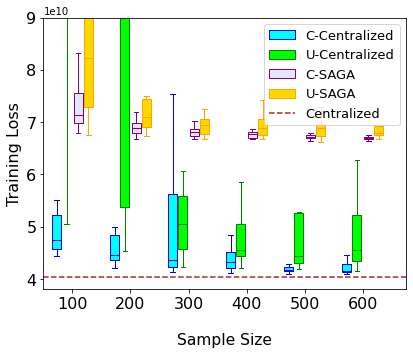

In [64]:
a1 = np.load('./res/ridge-kc/ridge-centralized-c100s-train.npy')
b1 = np.load('./res/ridge-kc/ridge-centralized-c200s-train.npy')
c1 = np.load('./res/ridge-kc/ridge-centralized-c300s-train.npy')
d1 = np.load('./res/ridge-kc/ridge-centralized-c400s-train.npy')
e1 = np.load('./res/ridge-kc/ridge-centralized-c500s-train.npy')
f1 = np.load('./res/ridge-kc/ridge-centralized-c600s-train.npy')

a2 = np.load('./res/ridge-kc/ridge-saga-c100s-train.npy')
b2 = np.load('./res/ridge-kc/ridge-saga-c200s-train.npy')
c2 = np.load('./res/ridge-kc/ridge-saga-c300s-train.npy')
d2 = np.load('./res/ridge-kc/ridge-saga-c400s-train.npy')
e2 = np.load('./res/ridge-kc/ridge-saga-c500s-train.npy')
f2 = np.load('./res/ridge-kc/ridge-saga-c600s-train.npy')

a3 = np.load('./res/ridge-kc/ridge-centralized-u100s-train.npy')
b3 = np.load('./res/ridge-kc/ridge-centralized-u200s-train.npy')
c3 = np.load('./res/ridge-kc/ridge-centralized-u300s-train.npy')
d3 = np.load('./res/ridge-kc/ridge-centralized-u400s-train.npy')
e3 = np.load('./res/ridge-kc/ridge-centralized-u500s-train.npy')
f3 = np.load('./res/ridge-kc/ridge-centralized-u600s-train.npy')

a4 = np.load('./res/ridge-kc/ridge-saga-u100s-train.npy')
b4 = np.load('./res/ridge-kc/ridge-saga-u200s-train.npy')
c4 = np.load('./res/ridge-kc/ridge-saga-u300s-train.npy')
d4 = np.load('./res/ridge-kc/ridge-saga-u400s-train.npy')
e4 = np.load('./res/ridge-kc/ridge-saga-u500s-train.npy')
f4 = np.load('./res/ridge-kc/ridge-saga-u600s-train.npy')


k = np.load('./res/ridge-kc/ridge-centralized-train.npy')

k = np.mean(k)

data1 = [a1,b1,c1,d1,e1,f1]
data2 = [a2,b2,c2,d2,e2,f2]
data3 = [a3,b3,c3,d3,e3,f3]
data4 = [a4,b4,c4,d4,e4,f4]

ticks = ['100\n','200','300','400','500','600'] 

plt.figure(figsize=(6.5,5))

linek = plt.axhline(y=k, color='brown', linestyle='--')

bp1 = plt.boxplot(data1, positions=np.array(range(len(data1)))*4.0-1.1, sym='', widths=0.6, patch_artist=True)
bp3 = plt.boxplot(data3, positions=np.array(range(len(data3)))*4.0-0.4, sym='', widths=0.6, patch_artist=True)
bp2 = plt.boxplot(data2, positions=np.array(range(len(data2)))*4.0+0.4, sym='', widths=0.6, patch_artist=True)
bp4 = plt.boxplot(data4, positions=np.array(range(len(data4)))*4.0+1.1, sym='', widths=0.6, patch_artist=True)
set_box_color(bp1, 'blue', 'cyan') # colors are from http://colorbrewer2.org/
set_box_color(bp2, 'purple', 'lavender')
set_box_color(bp3, 'green', 'lime')
set_box_color(bp4, 'orange', 'gold')

plt.xticks(range(0, len(ticks) * 4, 4), ticks, fontsize=16)
plt.xlim(-2, len(ticks)*4-1)
plt.yticks(fontsize=16)
plt.ylim([3.8e10,9e10])

plt.xlabel('Sample Size', fontsize=15.5)
plt.ylabel('Training Loss', fontsize=16)

plt.legend([bp1["boxes"][0], bp3["boxes"][0], bp2["boxes"][0], bp4["boxes"][0], linek], \
           ['C-Centralized', 'U-Centralized', 'C-SAGA', 'U-SAGA', 'Centralized'], loc='upper right', prop = {'size':13})

plt.savefig("ridgeds-kc.png", bbox_inches='tight')
plt.show()

In [61]:
num_of_data = 21613
num_of_dim = 18
num_of_party = 2

10.0
3000.0
3000.0


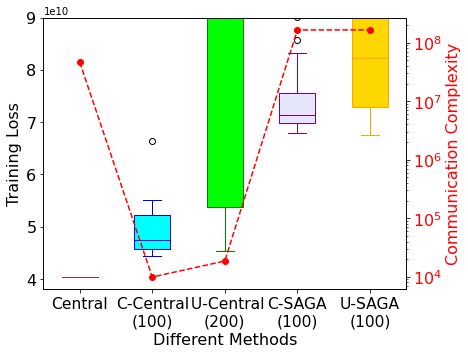

In [80]:
a = np.load("./res/ridge-kc/ridge-centralized-train.npy")
b = np.load("./res/ridge-kc/ridge-centralized-c100s-train.npy")
c = np.load("./res/ridge-kc/ridge-centralized-u200s-train.npy")

e = np.load("./res/ridge-kc/ridge-saga-c100s-train.npy")
f = np.load("./res/ridge-kc/ridge-saga-u100s-train.npy")

e_iter = np.load("./res/ridge-kc/ridge-saga-c100s-iter.npy")
f_iter = np.load("./res/ridge-kc/ridge-saga-u100s-iter.npy")

e_iter = np.mean(e_iter)
f_iter = np.mean(f_iter)
print(d_iter)
print(e_iter)
print(f_iter)

a_comm = centralized_comm(num_of_data, num_of_dim)
b_comm = coreset_centralized_comm(100, num_of_party, num_of_dim)
c_comm = uniform_centralized_comm(200, num_of_party, num_of_dim)

e_comm = coreset_saga_comm(100, num_of_party, num_of_dim, e_iter*100)
f_comm = uniform_saga_comm(100, num_of_party, num_of_dim, f_iter*100)

cost_seq = [a,b,c,e,f]
comm_seq = [a_comm,b_comm,c_comm,e_comm,f_comm]

fig, ax1 = plt.subplots(figsize=(6.5,5))
ax1.set_xlabel('Different Methods',fontsize=16)
ax1.set_ylabel('Training Loss',fontsize=16)
#ax1.tick_params(axis='y', labelcolor='blue')
#bp = box_plot(cost_seq, ax1, labels, 'blue', 'white')
bp1 = ax1.boxplot([a], positions=[1], widths=0.5, patch_artist=True,labels=['Central'])
bp2 = ax1.boxplot([b], positions=[2], widths=0.5, patch_artist=True,labels=['C-Central\n(100)'])
bp3 = ax1.boxplot([c], positions=[3], widths=0.5, patch_artist=True,labels=[' U-Central\n(200)'])

bp5 = ax1.boxplot([e], positions=[4], widths=0.5, patch_artist=True,labels=['C-SAGA\n(100)'])
bp6 = ax1.boxplot([f], positions=[5], widths=0.5, patch_artist=True,labels=['U-SAGA\n(100)'])

set_box_color(bp1, 'brown', 'white')
set_box_color(bp2, 'blue', 'cyan')
set_box_color(bp3, 'green', 'lime')
set_box_color(bp5, 'purple', 'lavender')
set_box_color(bp6, 'orange', 'gold')

ax1.tick_params(axis='x',labelsize=15.5)
ax1.tick_params(axis='y',labelsize=16)
ax1.set_ylim([3.8e10,9e10])

ax2 = ax1.twinx()
ax2.set_ylabel('Communication Complexity', color='red',fontsize=16)
ax2.set_yscale('log')
ax2.tick_params(axis='y', labelcolor='red',labelsize=16)
ax2.plot([1,2,3,4,5], comm_seq, 'ro--')
plt.savefig("ridgedm-kc.png", bbox_inches='tight')
plt.show()